In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge


%matplotlib inline

# 1. –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ –∏–∑ —Ñ–∞–π–ª–∞

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏–ª–∏ –∑–∞–ø–∏—Å–µ–π –ø–æ –æ–±—å–µ–∫—Ç–∞–º —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç: ',df.shape[0])

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏–ª–∏ –∑–∞–ø–∏—Å–µ–π –ø–æ –æ–±—å–µ–∫—Ç–∞–º —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç:  48895


In [4]:
df.head(3)

id                                 name  host_id  host_name  \
0  2539   Clean & quiet apt home by the park     2787       John   
1  2595                Skylit Midtown Castle     2845   Jennifer   
2  3647  THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   
2    150               3                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365

* id - –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä,
* name - –Ω–∞–∑–≤–∞–Ω–∏–µ –æ–±—å–µ–∫—Ç–∞,
* host_id - –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –≤–ª–∞–¥–µ–ª—å—Ü–∞,
* host_name - –∏–º—è –≤–ª–∞–¥–µ–ª—å—Ü–∞,
* neighbourhood_group - —Ä–∞–π–æ–Ω –≥–æ—Ä–æ–¥–∞,
* 'neighbourhoo - —Ä–∞–π–æ–Ω'
* 'latitud - —à–∏—Ä–æ–∞—Ç–∞'
* 'longitud - –¥–æ–ª–≥–æ—Ç–∞'
* 'room_typ - —Ç–∏–ø –∫–æ–º–Ω–∞—Ç—ã'
* 'pric - —Ü–µ–Ω–∞'
*  'minimum_nigh - –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–æ—á–µ–πs
*  'number_of_revie - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤s
*  'last_revi - –ø–æ—Å–ª–µ–¥–Ω–∏–π –æ—Ç–∑—ã–≤w
*   'reviews_per_mo - –æ—Ç–∑—ã–≤—ã –∑–∞ –º–µ—Å—è—Üt
* , 'calculated_host_listings_c - —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ø–∏—Å–∫–æ–≤ –≤–ª–∞–¥–µ–ª—å—Ü–µ–≤n
*    'availability - –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å 365.365'

#### –î–ª—è –Ω–∞—Å —è–≤–ª—è–µ—Ç—Å—è –Ω–∞–∏–±–æ–ª–µ–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–º —Å—Ç–æ–ª–±–µ—Ü price - —ç—Ç–æ —Ü–µ–Ω–∞ –∑–∞ –Ω–æ—á—å –ø—Ä–µ–±—ã–≤–∞–Ω–∏—è.

# 2. –ê–Ω–Ω–∞–ª–∏–∑ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π price

–°—Ç–æ–ª–±–µ—Ü price - —ç—Ç–æ –Ω–∞—à–∞ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è y. –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è y - —ç—Ç–æ –∑–Ω–∞—á–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –º—ã –±—É–¥–µ—Ç —Å—Ç–∞—Ä–∞—Ç—å—Å—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å.

–ü–µ—Ä–≤—ã–π —à–∞–≥ EDA - –ø—Ä–æ–≤–µ—Ä–∫–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è y! –ü–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É —Ü–µ–ª–µ–≤–æ–π —Ñ—É–Ω–∫—Ü–∏–∏. 

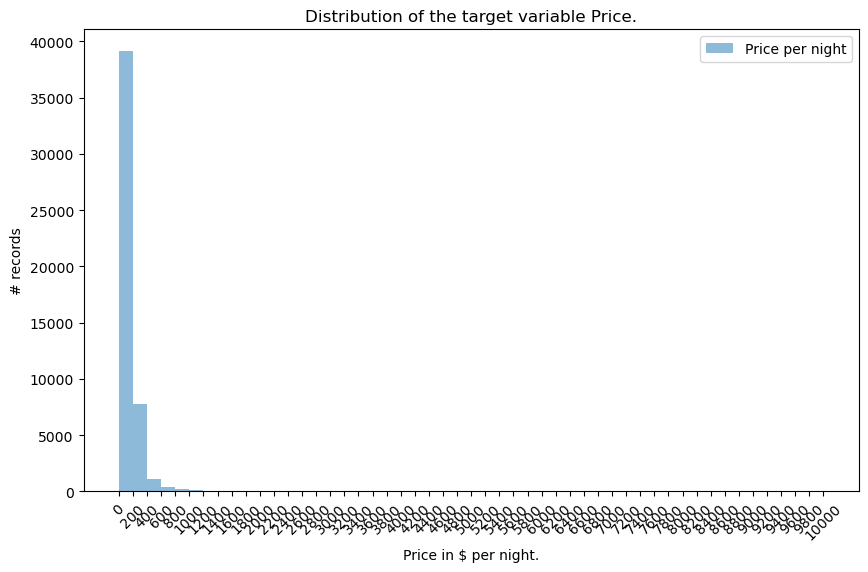

In [5]:
data = df['price']

fig, ax = plt.subplots(figsize = (10,6))

_,bins,_ = ax.hist(data, label = 'Price per night', alpha = 0.5, bins = 50)

ax.set_title('Distribution of the target variable Price.')
ax.set_xlabel('Price in $ per night.')
ax.set_ylabel('# records')
ax.set_xticks(bins)
ax.tick_params(axis='x', rotation = 45)
ax.legend()
plt.show()

–í–æ–∑–≥–ª—è–Ω—É–≤ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫ –º–æ–∂–Ω–æ —Å—Ä–∞–∑—É –∂–µ –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–º–µ–µ—Ç –æ—á–µ–Ω—å –¥–ª–∏–Ω–Ω—ã–π —Ö–≤–æ—Å—Ç —Å–ø—Ä–∞–≤–∞. –ò –≥—Ä–∞—Ñ–∏–∫ –ø–æ —Å—É—Ç–∏ –Ω–µ—á–∏—Ç–∞–µ–º, –ø–æ—Å–∫–æ–ª—å–∫—É –±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –æ–±—å–µ–∫—Ç–æ–≤ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ —Å–¥–∞–µ—Ç—Å—è –ø–æ —Ü–µ–Ω–µ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç –Ω—É–ª—è –¥–æ 1000 –¥–æ–ª–ª–ª–∞—Ä–æ–≤, –æ—Å—Ç–∞–ª—å–Ω–∞—è —á–∞—Å—Ç—å –æ–±—å–µ–∫—Ç–æ–≤ —Å–¥–∞–µ—Ç—Å—è –ø–æ –≤—ã—Å–æ–∫–æ–π —Ü–µ–Ω–µ, –Ω–æ –∏—Ö –≤–µ—Å—å–º–∞ –Ω–µ–±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å–≤—Ç–æ, —Ç–∞–∫–æ–µ —á—Ç–æ –¥–∞–∂–µ –Ω–∞ –Ω–∞—à–µ–º –≥—Ä–∞—Ñ–∏–∫–µ –Ω–µ –≤–∏–¥–Ω–æ. 

–¢–∞–∫ –∂–µ –º—ã –º–æ–∂–µ–º –≤–∑–≥–ª—è–Ω—É—Ç—å –±–æ–ª–µ–µ –ø–æ–¥—Ä–æ–±–Ω–æ –Ω–∞ —É—á–∞—Å—Ç–æ–∫ —Å —Ü–µ–Ω–∞–º–∏ –æ—Ç –Ω—É–ª—è –¥–ª 1000 –¥–æ–ª–ª–∞—Ä–æ–≤. 

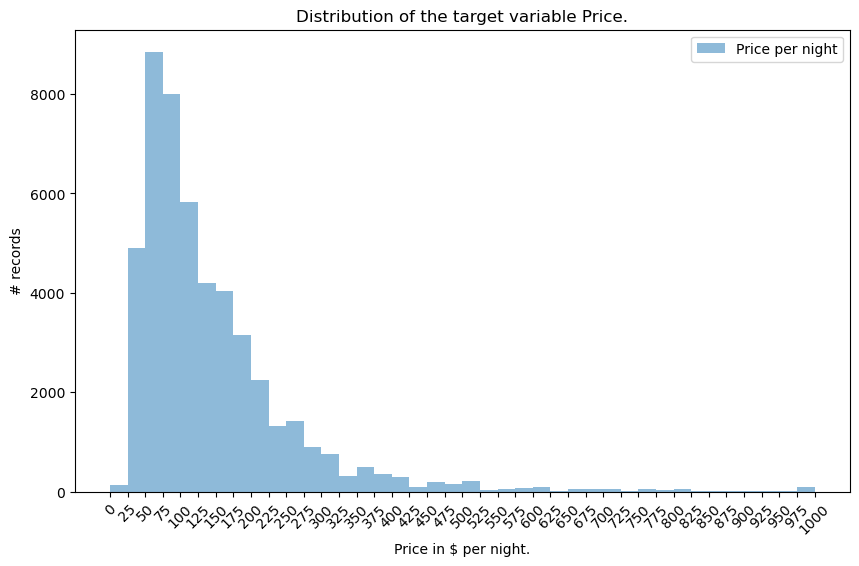

In [6]:
data = df[df['price'] < 1001]['price']

fig, ax = plt.subplots(figsize = (10,6))

_,bins,_ = ax.hist(data, label = 'Price per night', alpha = 0.5, bins = 40)

ax.set_title('Distribution of the target variable Price.')
ax.set_xlabel('Price in $ per night.')
ax.set_ylabel('# records')
ax.set_xticks(bins)
ax.tick_params(axis='x', rotation = 45)
ax.legend()
plt.show()

# 3. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ—Å—Ç–∞–ª—å–Ω—ã—Ö —Ñ–∏—á–µ–π.

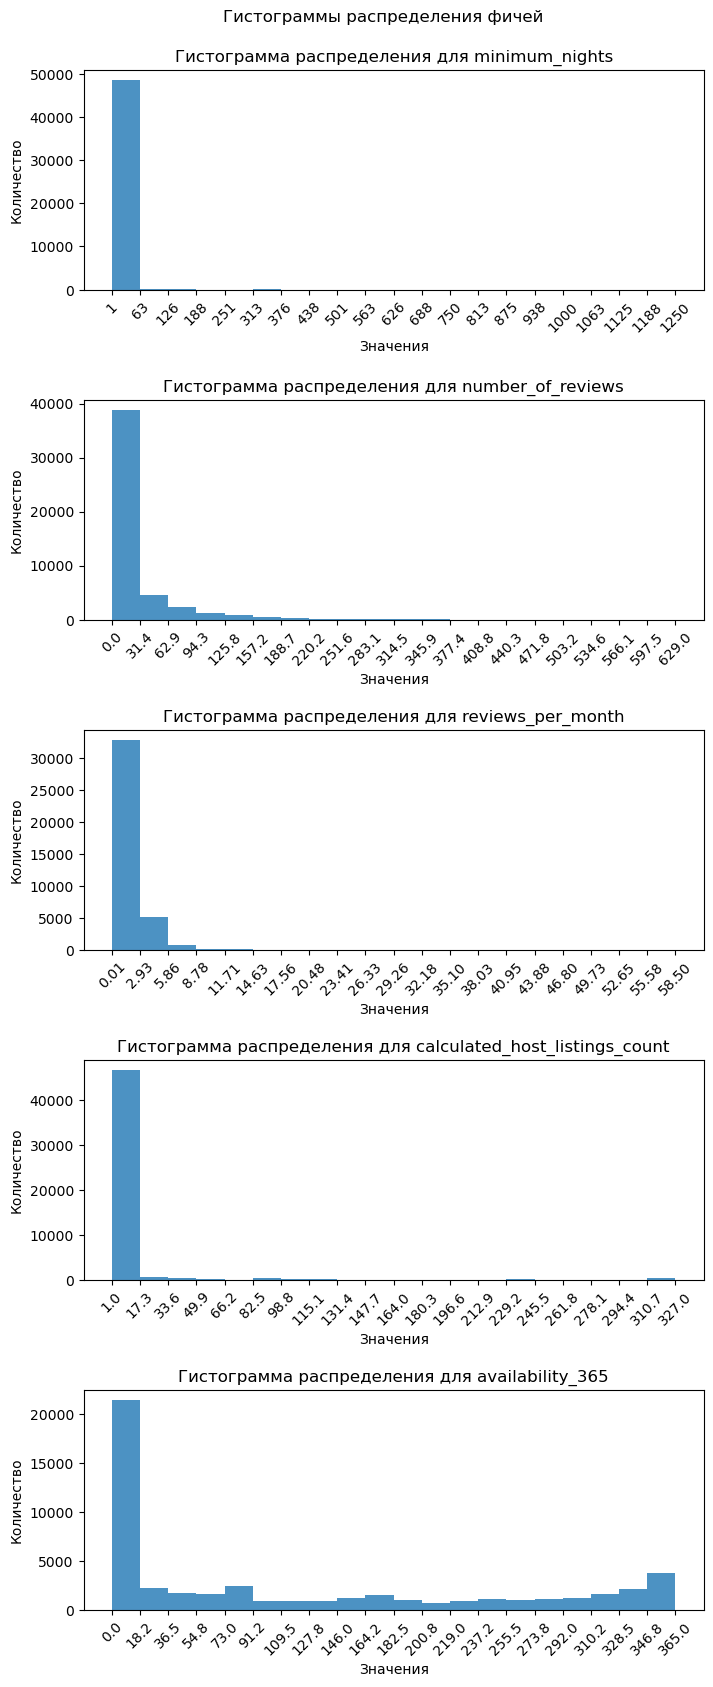

In [7]:
fig, ax = plt.subplots(nrows= 5, ncols= 1, figsize = (8, 20))

data_s = ['minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365']

for i, feature in enumerate(data_s):
        data_S = df[feature]
        _,bins,_ = ax[i].hist(data_S, label = feature, alpha = 0.8, bins = 20)
        ax[i].set_title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª—è ' + feature, y = 1)
        ax[i].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
        ax[i].set_xticks(bins)
        ax[i].tick_params(axis='x', rotation = 45)
        ax[i].set_xlabel('–ó–Ω–∞—á–µ–Ω–∏—è')
                
fig.suptitle('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ñ–∏—á–µ–π', y = 0.91)
plt.subplots_adjust(hspace = 0.5)
plt.show()

–ü–æ—Ö–æ–∂–µ —á—Ç–æ —É –Ω–∞—à–∏—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –æ—á–µ–Ω—å –¥–ª–∏–Ω–Ω—ã–µ —Ö–≤–æ—Å—Ç—ã. –í –¥–∞–ª—å–Ω–µ–π—à–µ–º —ç—Ç–æ –º–æ–∂–µ—Ç –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ —Å–∫–∞–∑–∞—Ç—å—Å—è –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–µ –º–æ–µ–ª–∏. 

# 4. –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞–ª–∏—á–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ –∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π –≤ –¥–∞–Ω–Ω—ã—Ö.

–î–ª—è –Ω–∞—á–∞–ª–∞ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ –≤ –Ω–∞—à–∏—Ö —Ñ–∏—á–∞—Ö.

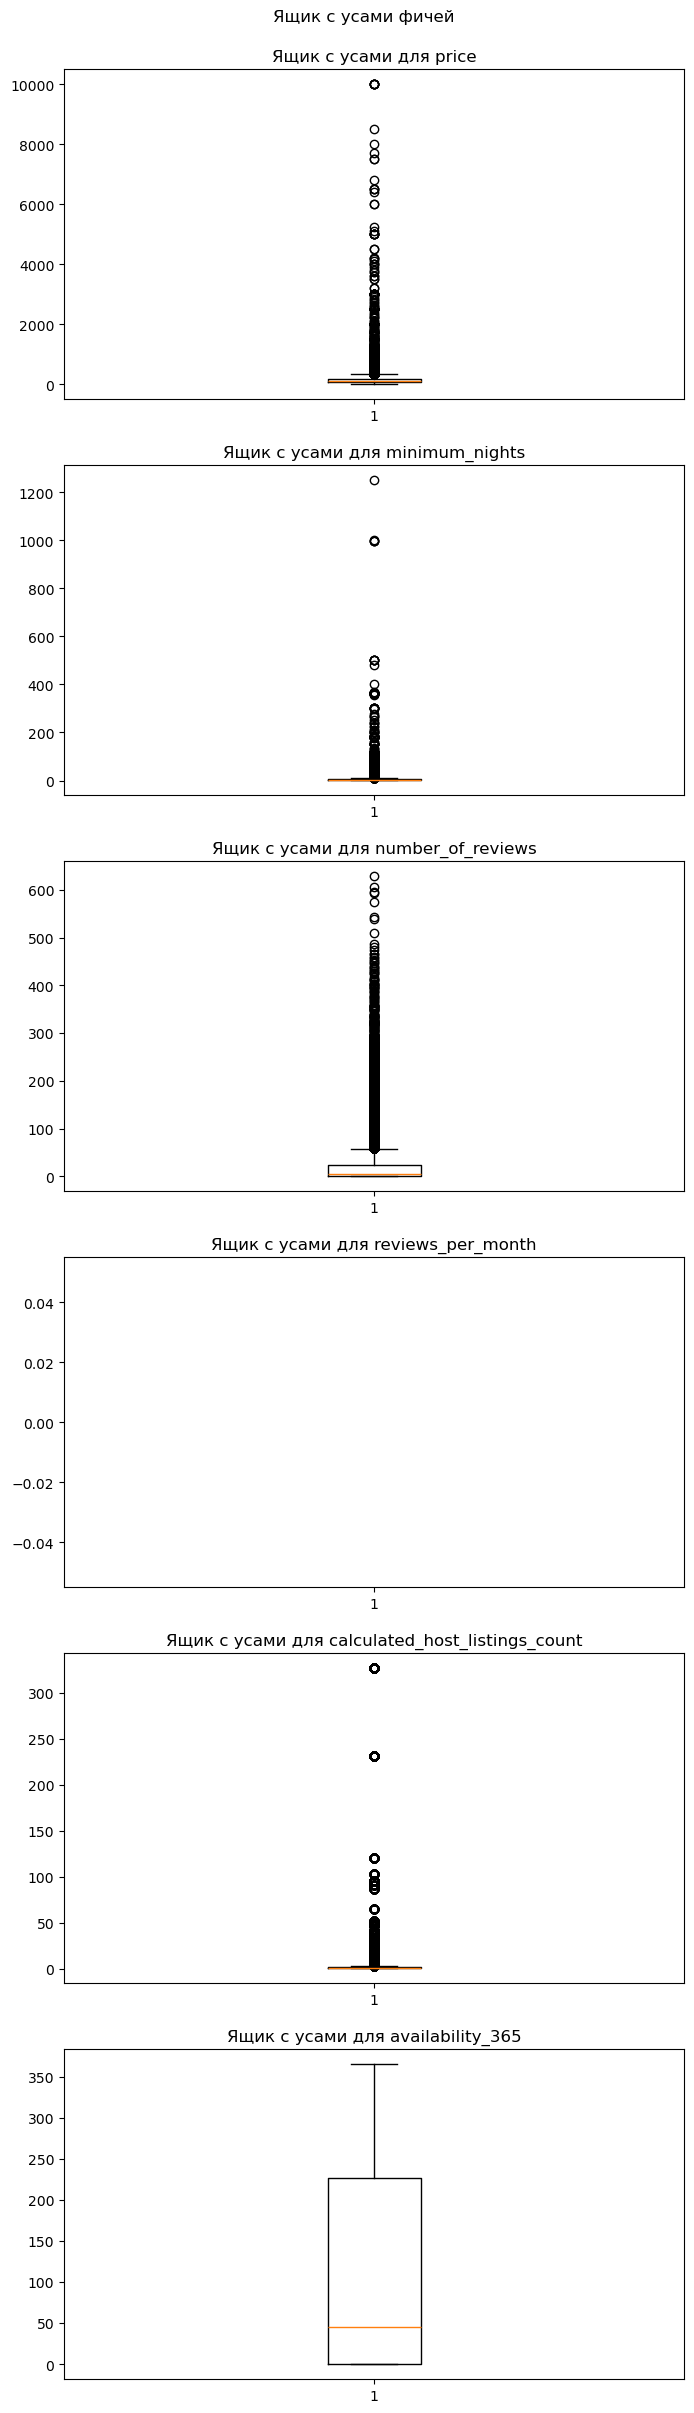

In [8]:
fig, ax = plt.subplots(nrows= 6, ncols= 1, figsize = (8, 30))

data_s = ['price','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365']

for i, feature in enumerate(data_s):
        data_S = df[feature]
        ax[i].boxplot(data_S)
        ax[i].set_title('–Ø—â–∏–∫ —Å —É—Å–∞–º–∏ –¥–ª—è ' + feature, y = 1)
                        
fig.suptitle('–Ø—â–∏–∫ —Å —É—Å–∞–º–∏ —Ñ–∏—á–µ–π', y = 0.9)
plt.subplots_adjust(hspace = 0.2)
plt.show()

–ö–∞–∫ –º—ã –≤–∏–¥–∏–º —É –Ω–∞—Å –æ–≥—Ä–æ–º–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –≤—Å–µ–º —Ñ–∏—á–∞–º, –∫—Ä–æ–º–µ —Ñ–∏—á–∏ "–î–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å 365". –î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π —Ñ–∏—á–µ–π –∫ —Ü–µ–Ω–µ.

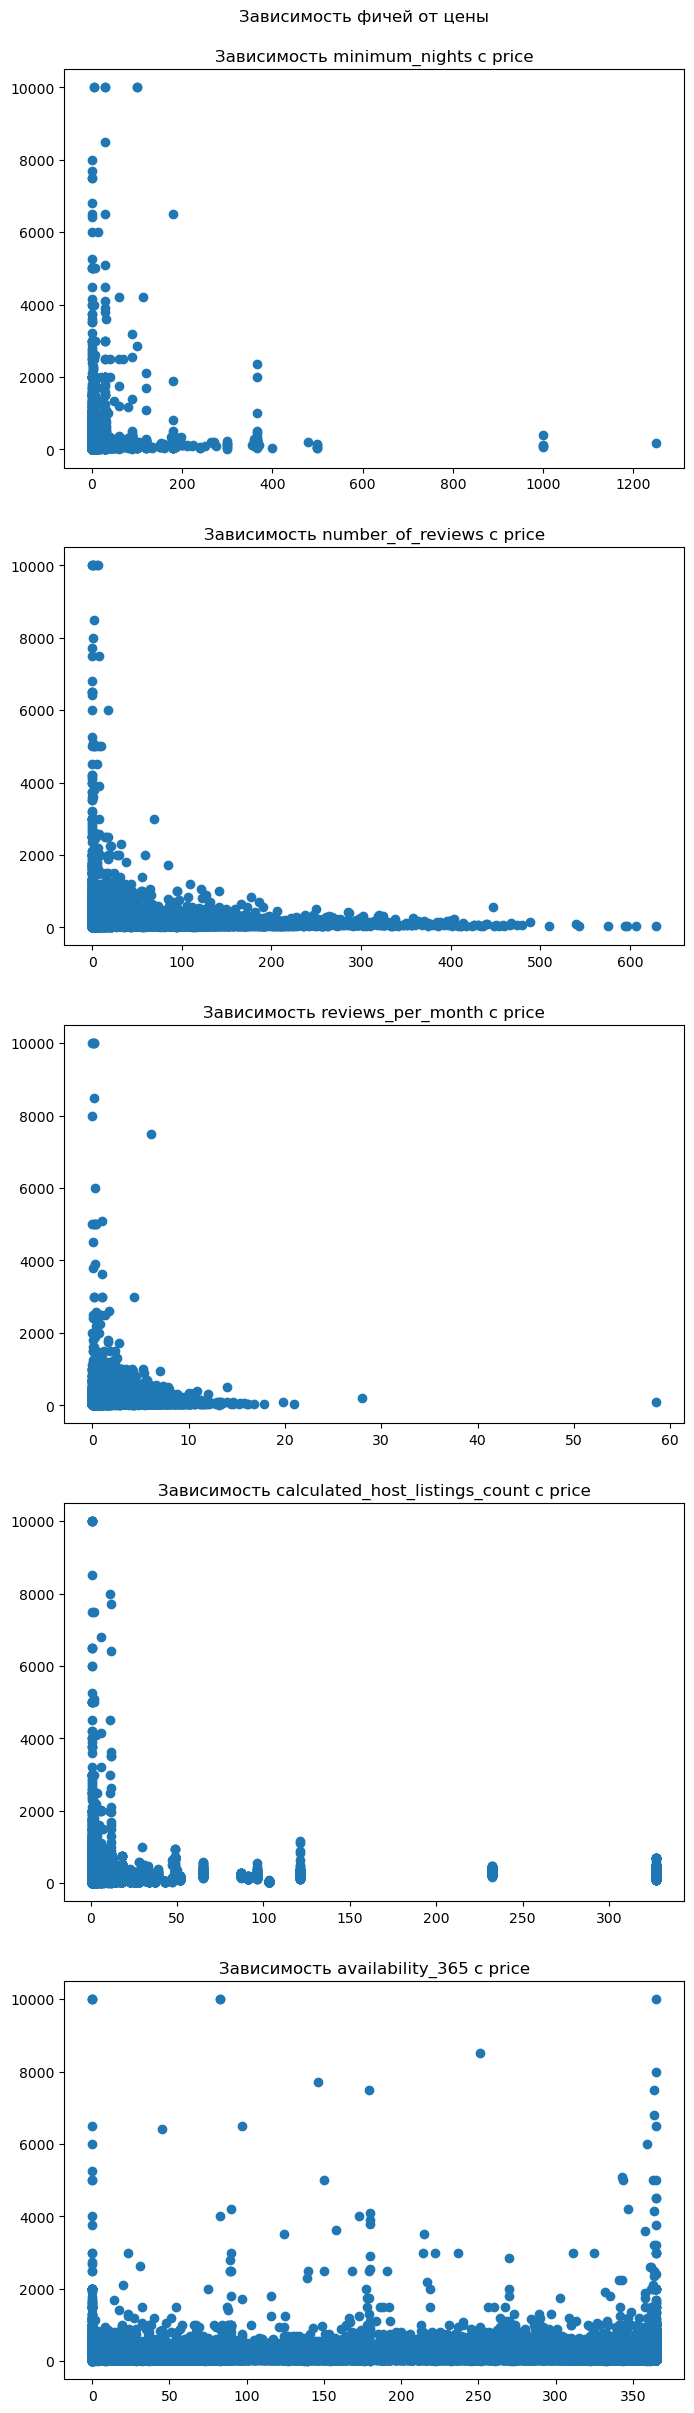

In [9]:
fig, axs = plt.subplots(nrows = 5, ncols = 1, sharey = True, figsize = (8,30)) # –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –≥—Ä–∞—Ñ–∏–∫, —Å–¥–µ–ª–∞–µ–º –æ–±—â–µ–π –æ—Å—å –£
#–∑–∞–≤–µ–¥–µ–º –¥–≤–∞ —Å–ø–∏—Å–∫–∞ —Å –∏–∑–¥–∞—Ç–µ–ª–º–∏ –∏ –∂–∞–Ω—Ä–∞–º–∏  –ø–æ –∫–æ—Ç–æ—Ä—ã–º –º—ã –±—É–¥–µ–º –∏—Ç–µ—Ä–∏—Ä–æ–≤–∞—Ç—å
feature = ['minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365']
main_feature = ['price']

for i, value in enumerate(feature):
    ax = axs[i]
    ax.scatter(df[value], df[main_feature], label = str(value) + '—Å price')
    ax.set_title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å ' + str(value) + ' c price')

fig.suptitle('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ñ–∏—á–µ–π –æ—Ç —Ü–µ–Ω—ã', y = 0.9)            
plt.show()

–ü–æ—Å–∫–æ–ª—å–∫—É –≤ –¥–∞–Ω–Ω—ã—Ö –º–Ω–æ–≥–æ –≤—ã–±—Ä–æ—Å–æ–≤ –∏ –µ—Å—Ç—å –Ω–∞–ª–∏—á–∏–µ –æ—á–µ–Ω—å –¥–ª–∏–Ω–Ω—ã—Ö —Ö–≤–æ—Å—Ç–æ–≤ - –ø–æ –≥—Ä–∞—Ñ–∏–∫–∞–º —Ç—Ä—É–¥–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å, –ø–æ—ç—Ç–æ–º—É –ø–æ—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π.

In [10]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


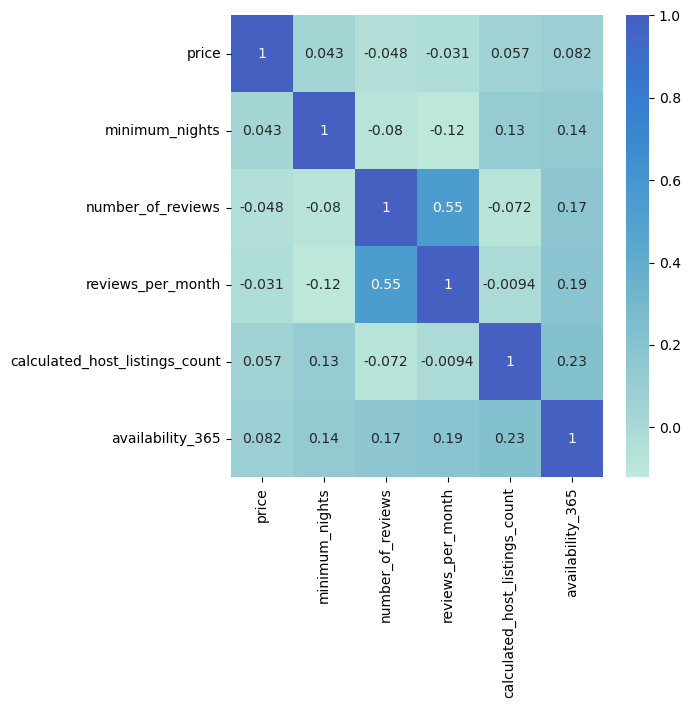

In [11]:
data_s = ['price','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365']
corr_m = df[data_s].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_m, center=2, annot=True)
plt.show()

–ò —Ç–∞–∫ –º—ã –≤–∏–¥–∏–º —á—Ç–æ —Ü–µ–Ω–∞ –≤–æ–æ–±—â–µ –Ω–µ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç –Ω–∏ —Å –æ–¥–Ω–æ–π —Ñ–∏—á–µ–π.

# 5. –ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏ –∏—Ö –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ.

–ò —Ç–∞–∫ –ø–æ—Å–∫–æ–ª—å–∫—É –º–æ–¥–µ–ª–∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –Ω–µ—É–º–µ—é—Ç –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, —Ç–æ –Ω–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å—Å—è —á—Ç–æ —Å –Ω–∏–º–∏ –¥–µ–ª–∞—Ç—å. –î–∞–≤–∞–π—Ç–µ –¥–ª—è –Ω–∞—á–∞–ª–∞ –≤—ã—Å–Ω–∏–º –Ω–∞–ª–∏—á–∏–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π. 

In [12]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

–ú—ã –≤–∏–¥–∏–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ –ø–æ–ª—è—Ö –Ω–∞–∑–≤–∞–Ω–∏–µ –æ–±—å–µ–∫—Ç–∞ - 16 —à—É—Ç–∫ –∏ –≤ –∏–º–µ–Ω–∞—Ö —Ö–æ—Ö—è–∏–Ω–∞ - 21 –ø—Ä–æ–ø—É—à–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ. –ò –û–ì–†–û–ú–ù–û–ï –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –ø–æ–ª—è—Ö –ø–æ—Å–ª–µ–¥–Ω–∏–π –æ—Ç–∑—ã–≤ –∏ –æ—Ç–∑—ã–≤—ã –∑–∞ –º–µ—Å—è—Ü.  **–û–ß–ï–ù–¨ –í–ê–ñ–ù–û!** –ü–æ–ª–µ price - –Ω–µ—Å–æ–¥–µ—Ä–∂–∏—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –≤–µ–¥—å –¥–ª—è –Ω–∞—Å –≤–∞–∂–Ω—ã –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è —Ü–µ–Ω—ã! –ò —Ç–∞–∫ –û–ì–†–û–ú–ù–û–ï –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –º—ã –¥–æ–ª–∂–Ω—ã –∑–∞–ø–æ–º–Ω–∏—Ç—å –∏ –ø–µ—Ä–µ–¥ –æ–±—É—á–µ–Ω–∏–µ–º –º–æ–¥–µ–ª–∏ —Ä–µ—à–∏—Ç—å —á—Ç–æ —Å —ç—Ç–∏–º –¥–µ–ª–∞—Ç—å, –Ω–æ –ø–æ–∫–∞ –∑–∞–ø–æ–º–Ω–∏–º, —á—Ç–æ —É –Ω–∞—Å –∏–º–µ—é—Ç—Å—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.

–ò–Ω–æ–≥–¥–∞ –ø—Ä–∏ —Ä–∞–±–æ—Ç–µ —Å –¥–∞–Ω–Ω—ã–º–∏ –º–æ–∂–Ω–æ —Å—Ç–æ–ª–∫–Ω—É—Ç—å—Å—è —Å —Ç–∞–∫–æ–π –ø—Ä–æ–±–ª–µ–º–æ–π: –≤ –¥–∞–Ω–Ω—ã—Ö –µ—Å—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, –Ω–æ —É–¥–∞–ª—è—Ç—å –∏–∑ —Ç–∞–±–ª–∏—Ü—ã —Å—Ç—Ä–æ–∫–∏ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –Ω–µ —Ö–æ—á–µ—Ç—Å—è, –ø–æ—Å–∫–æ–ª—å–∫—É –≤ —ç—Ç–∏—Ö —Å—Ç—Ä–æ–∫–∞—Ö –µ—Å—Ç—å —Ç–∞–∫–∂–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–µ —è—á–µ–π–∫–∏ —Å —Ü–µ–Ω–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π.

–•–æ—Ç—è –º—ã –º–æ–∂–µ–º –Ω–∞ —ç—Ç–æ –ø–æ–π—Ç–∏ –∏ —É–¥–∞–ª–∏—Ç—å –¥–∞–Ω–Ω—ã–µ - —ç—Ç–æ —è–≤–ª—è–µ—Ç—Å—è –æ–¥–∏–Ω –∏–∑ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ —Ä–µ—à–µ–Ω–∏—è –¥–∞–Ω–Ω–æ–π –ø—Ä–æ–±–ª–µ–º—ã. 
–ù–æ –µ—â–µ –º–æ–∂–Ω–æ –∑–∞–ø–æ–ª–Ω–∏—Ç—å –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω—É–ª—è–º–∏, –≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ –º—ã –Ω–µ –±—É–¥–µ–º —Ç–µ—Ä—è—Ç—å —Ü–µ–Ω–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑ –¥—Ä—É–≥–∏—Ö —è—á–µ–µ–∫, –∞ –ø–µ—Ä–µ–º–Ω–æ–∂–µ–Ω–Ω—ã–µ –≤–µ—Å–æ–≤—ã–µ –∫–æ—ç—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —Å —Ç–∞–∫–∏–º–∏ —Ñ–∏—á–∞–º–∏ –≤—Å–µ —Ä–∞–≤–Ω–æ –±—É–¥—É—Ç –¥–∞–≤–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –Ω–æ–ª—å.
–≠—Ç–æ—Ç –º–µ—Ç–æ–¥ –Ω–µ–∏–¥–µ–ª–∞—å–Ω–æ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –Ω–æ —á–∞—Å—Ç–æ —Ä–∞–±–æ—Ç–∞–µ—Ç —Ö–æ—Ä–æ—à–æ. 

–ê–ª—å—Ç–µ–Ω–∞—Ç–∏–≤–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã - –∑–∞–º–µ–Ω—ã –æ—Ç—Å—É—Ç—Å–≤—é—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Å—Ä–µ–¥–Ω–∏–º–∏. 

–ü–æ–ª–µ last_review - —Å–æ–¥–µ—Ä–¥–∏—Ç —Ç–∏–ø –æ–±—å–µ–∫—Ç, –∏ –∫–∞–∫ –º—ã —Ä–∞–Ω–µ–µ –≤–∏–¥–µ–ª–∏ —Ç–∞–º –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –¥–∞—Ç–∞. –ß—Ç–æ –∂–µ, –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º—ã –Ω–µ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü –ø–æ—ç—Ç–æ–º—É —Å–º–µ–ª–æ –º–æ–∂–µ–º –∑–∞–ø–æ–ª–Ω–∏—Ç—å –µ–≥–æ –Ω—É–ª—è–º–∏. –ü–æ–ª–µ reviews_per_month —Å–æ–¥–µ—Ä–¥–∏—Ç —á–∏—Å–ª–∞ —Å –ø–ª–∞–≤–∞—é—â–µ–π —Ç–æ—á–∫–æ–π, –º—ã –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç—Ç–æ—Ç —Å—Ç–æ–ª–±–µ—Ü –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –∏ –∏ –∑–∞–ø–æ–ª–Ω–∏–º –µ–≥–æ –Ω—É–ª—è–º–∏. –ò–º—è –∏ –Ω–∞–∑–≤–∞–Ω–∏–µ –æ–±—å–µ–∫—Ç–æ–≤ —Å–ª–∏—à–∫–æ–º —Ä–∞–∑–Ω–Ω–æ–æ–±—Ä–∞–∑–Ω—ã –∏ –º–æ–≥—É—Ç –Ω–µ —è–≤–Ω–æ –≤–ª–∏—è—Ç—å –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –æ–±—É—á–µ–Ω–∏—è. –ü–æ—ç—Ç–æ–º—É –º—ã —Ç–æ–∂–µ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –∑–∞–ø–æ–ª–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω—É–ª—è–º–∏.  

In [13]:
df = df.fillna(0)
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# 6. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –∏—Ö –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è.

–ú—ã –Ω–µ –Ω–∞—à–ª–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π –º–µ–∂–¥—É —Ñ–∏—á–∞–º–∏ –∏ –ø—Ä–æ–≥–Ω–∞–∑–∏—Ä—É–µ–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –Ω–æ –º—ã —É–≤–∏–¥–∏–ª–∏ –¥–ª–∏–Ω–Ω—ã–µ —Ö–≤–æ—Å—Ç—ã –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö –∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤.

–û—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ —Å–ª–µ–¥—É–µ—Ç –ø—Ä–∏–º–µ–Ω–∏—Ç—å –º–µ—Ç–æ–¥—ã –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö:

* **–£–¥–∞–ª–∏—Ç—å –∏—Ö:** –ø—Ä–æ—Å—Ç–æ —É–±—Ä–∞—Ç—å –≤—ã–±—Ä–æ—Å—ã –∏–∑ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö, –Ω–æ —ç—Ç–æ –º–æ–∂–µ—Ç –ø–æ—Ç–µ—Ä—è—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é.
* **–ó–∞–º–µ–Ω–∏—Ç—å –Ω–∞ —Ç–∏–ø–∏—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:** –∑–∞–º–µ–Ω–∏—Ç—å –≤—ã–±—Ä–æ—Å—ã –Ω–∞ –±–æ–ª–µ–µ —Ç–∏–ø–∏—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, —á—Ç–æ–±—ã –æ–Ω–∏ –Ω–µ –∏—Å–∫–∞–∂–∞–ª–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.
* **–ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–æ–ª–µ–µ —É—Å—Ç–æ–π—á–∏–≤—ã–µ –º–µ—Ç–æ–¥—ã —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:** –≤–º–µ—Å—Ç–æ –æ–±—ã—á–Ω–æ–π –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Ç–æ–¥—ã, –∫–æ—Ç–æ—Ä—ã–µ –º–µ–Ω–µ–µ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã –∫ –≤—ã–±—Ä–æ—Å–∞–º, —Ç–∞–∫–∏–µ –∫–∞–∫ —Ä–æ–±–∞—Å—Ç–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –∏–ª–∏ –º–µ—Ç–æ–¥—ã —Ç–∏–ø–∞ –•—å—é–±–µ—Ä–∞. –≠—Ç–∏ –º–µ—Ç–æ–¥—ã —É—á—Ç—É—Ç –≤—ã–±—Ä–æ—Å—ã, –Ω–æ –Ω–µ –¥–∞–¥—É—Ç –∏–º —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–π –≤–ª–∞—Å—Ç–∏ –≤ –º–æ–¥–µ–ª–∏.

#### –®–∫–∞–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ –º–∞—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ

–ö–æ–≥–¥–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —à–∫–∞–ª–∏—Ä–æ–≤–∞–Ω–∏–µ

–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —É –Ω–∞—Å –µ—Å—Ç—å –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –æ –ø—Ä–æ–¥–∞–∂–∞—Ö –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π:

–û–¥–Ω–∞ –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è ‚Äî —ç—Ç–æ —Ü–µ–Ω–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è. –ú–æ–∂–µ—Ç –±—ã—Ç—å –æ—Ç –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Ç—ã—Å—è—á –¥–æ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –º–∏–ª–ª–∏–æ–Ω–æ–≤ –¥–æ–ª–ª–∞—Ä–æ–≤.
–î—Ä—É–≥–∞—è ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–Ω–Ω—ã—Ö –º–∞—à–∏–Ω. –ú–æ–∂–µ—Ç –≤–∞—Ä—å–∏—Ä–æ–≤–∞—Ç—å—Å—è –æ—Ç –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —à—Ç—É–∫ –¥–æ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Ç—ã—Å—è—á —à—Ç—É–∫.
–ï—Å–ª–∏ –º—ã –Ω–µ –±—É–¥–µ–º –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞—Ç—å —ç—Ç–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ, —Ç–æ –º–æ–¥–µ–ª—å –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –±—É–¥–µ—Ç —É–¥–µ–ª—è—Ç—å –±–æ–ª—å—à–µ –≤–Ω–∏–º–∞–Ω–∏—è —Ü–µ–Ω–µ –∞–≤—Ç–æ–º–æ–±–∏–ª—è, —á–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ø—Ä–æ–¥–∞–Ω–Ω—ã—Ö –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π. –≠—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ —Ü–µ–Ω–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è –∏–º–µ–µ—Ç –±–æ–ª–µ–µ —à–∏—Ä–æ–∫–∏–π –¥–∏–∞–ø–∞–∑–æ–Ω –∑–Ω–∞—á–µ–Ω–∏–π.

–í –∞–ª–≥–æ—Ä–∏—Ç–º–∞—Ö –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –∏ –∞–Ω–∞–ª–∏–∑–∞ –¥–∞–Ω–Ω—ã—Ö —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è –∫ –≤—Ö–æ–¥–Ω—ã–º –¥–∞–Ω–Ω—ã–º, –Ω–∞–ø—Ä–∏–º–µ—Ä: –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å –≥–∞—É—Å—Å–æ–≤—Å–∫–æ–µ –∏–ª–∏ –ø—É–∞—Å—Å–æ–Ω–æ–≤—Å–∫–æ–µ; –¥–∞–Ω–Ω—ã–µ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –≤ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–º –º–∞—Å—à—Ç–∞–±–µ. 

–ü–µ—Ä–µ–¥ –∞–Ω–∞–ª–∏—Ç–∏–∫–æ–º —á–∞—Å—Ç–æ —Å—Ç–æ–∏—Ç –∑–∞–¥–∞—á–∞ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏ –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ–±—ã —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç—å —É—Å–ª–æ–≤–∏—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞. –ò–≥–Ω–æ—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ —ç—Ç–∏—Ö —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–π –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º. 

–¢—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏ –ø—Ä–∏–º–µ–Ω–∏–º—ã –Ω–µ —Ç–æ–ª—å–∫–æ –∫ —Ñ–∏—á–∞–º, –Ω–æ –∏ –∫ —Ü–µ–ª–µ–≤—ã–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º. 

–ü—Ä–∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–µ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –ø—Ä–∏–º–µ–Ω—è—é—Ç—Å—è –ø—Ä–∏—ë–º—ã –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏. 

–î–ª—è –±–æ—Ä—å–±—ã —Å –±–æ–ª—å—à–∏–º–∏ –ø–æ –º–æ–¥—É–ª—é –∑–Ω–∞—á–µ–Ω–∏—è–º–∏, –∫–æ—Ç–æ—Ä—ã–µ —è–≤–ª—è—é—Ç—Å—è ¬´–≤—ã–±—Ä–æ—Å–∞–º–∏¬ª, –æ–±—ã—á–Ω–æ –∏—Å–ø–æ–ª—å–∑—É—é—Ç: –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ np.log; –∏–∑–≤–ª–µ—á–µ–Ω–∏–µ –∫–≤–∞–¥—Ä–∞—Ç–Ω–æ–≥–æ –∫–æ—Ä–Ω—è np.sqrt. 

–û–±–∞ —ç—Ç–∏—Ö –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —è–≤–ª—è—é—Ç—Å—è –º–æ–Ω–æ—Ç–æ–Ω–Ω—ã–º–∏, —Ç–æ –µ—Å—Ç—å –æ–Ω–∏ –º–µ–Ω—è—é—Ç –∞–±—Å–æ–ª—é—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, –Ω–æ —Å–æ—Ö—Ä–∞–Ω—è—é—Ç –ø–æ—Ä—è–¥–æ–∫ –≤–µ–ª–∏—á–∏–Ω. 

–ü—Ä–∏–º–µ—Ä –Ω–µ–º–æ–Ω–æ—Ç–æ–Ω–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –¥–ª—è –≤–µ–ª–∏—á–∏–Ω—ã ùë• ‚Äî —Ñ—É–Ω–∫—Ü–∏—è sinùë•. Standart Scaling (Standartization, Z-score Normalization) ‚Äî —Ç–µ—Ö–Ω–∏–∫–∞ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–∏–∑–Ω–∞–∫–∞, –∞–¥–∞–ø—Ç–∏—Ä—É—é—â–∞—è –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å —Ä–∞–∑–Ω—ã–º–∏ –¥–∏–∞–ø–∞–∑–æ–Ω–∞–º–∏ –∑–Ω–∞—á–µ–Ω–∏–π –∫ –ú–æ–¥–µ–ª—è–º (Model) –ú–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è (ML), –∏—Å–ø–æ–ª—å–∑—É—é—â–∏—Ö –¥–∏—Å—Ç–∞–Ω—Ü–∏—é –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è. 

–≠—Ç–∞ —Ä–∞–∑–Ω–æ–≤–∏–¥–Ω–æ—Å—Ç—å –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –æ—Ü–µ–Ω–∫–∏ (Z-Score) –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ –∏–∑ –∫–∞–∂–¥–æ–≥–æ –ù–∞–±–ª—é–¥–µ–Ω–∏—è (Observation) –∫–∞–∂–¥–æ–≥–æ –ü—Ä–∏–∑–Ω–∞–∫–∞ –≤—ã—á–∏—Ç–∞–µ—Ç—Å—è –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (Mean) –∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –¥–µ–ª–∏—Ç—Å—è –Ω–∞ –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ (Standard Deviation) —ç—Ç–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞. 

StandardScaler ‚Äî –∫–ª–∞—Å—Å –≤ –±–∏–±–ª–∏–æ—Ç–µ–∫–µ sklearn, —Ä–µ–∞–ª–∏–∑—É—é—â–∏–π –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ Z-Score: –º–µ—Ç–æ–¥ .fit() –≤—ã—á–∏—Å–ª—è–µ—Ç –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –¥–ª—è —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö; –º–µ—Ç–æ–¥ .transform() —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∏—Ä—É–µ—Ç –¥–∞–Ω–Ω—ã–µ; –º–µ—Ç–æ–¥ .fit_transform() –≤—ã—á–∏—Å–ª—è–µ—Ç –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –¥–ª—è —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏ –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è. –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è (Max-Min Normalization, Min-Max Scaling) ‚Äî —Ç–µ—Ö–Ω–∏–∫–∞ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–∏–∑–Ω–∞–∫–∞, –º–∞—Å—à—Ç–∞–±–∏—Ä—É—é—â–∞—è –∑–Ω–∞—á–µ–Ω–∏—è —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ –æ–Ω–∏ —Ä–∞—Å–ø–æ–ª–∞–≥–∞—é—Ç—Å—è –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç 0 –¥–æ 1:

–î–ª—è —Ç–æ–≥–æ —á—Ç–æ –±—ã —É–±—Ä–∞—Ç—å –±–ª–∏–Ω–Ω—ã–µ —Ö–≤–æ—Å—Ç—ã –µ—Å—Ç—å —Ç–∞–∫–∏–µ –º–µ—Ç–æ–¥—ã –∫–∞–∫ –ª–æ–≥–æ—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ. –î–ª–∏–Ω–Ω—ã–π —Ö–≤–æ—Å—Ç –≤ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ –±—É–¥–µ—Ç –≤–ª–∏—è—Ç—å –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏. –û–¥–∏–Ω –∏–∑ —Å–ø–æ—Å–æ–±–æ–≤ —Ä–µ—à–µ–Ω–∏—è —ç—Ç–æ–π –ø—Ä–æ–±–ª–µ–º—ã —Å–ª—É–∂–∏—Ç –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ. –ü—Ä–µ–º–∏–Ω–∏–≤ —Ñ—É–Ω–∫—Ü–∏—é log –∫ —Ü–µ–Ω–∞–º –º—ã —É—Å—Ç—Ä–∞–Ω–∏–º —ç—Ç–æ—Ç –Ω–µ–∂–µ–ª–∞—Ç–µ–ª—å–Ω—ã–π —ç—Ñ—Ñ–µ–∫—Ç.

y = log(y + 1), —á–∞—Ç—å +1 –Ω—É–∂–Ω–∞ –µ—Å–ª–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –∏–º–µ—é—Ç—Å—è –∑–∞–Ω—á–µ–Ω–∏—è 0, –ø–æ—Å–∫–æ–ª—å–∫—É –ª–æ–≥–∞—Ä–∏—Ñ–º –Ω—É–ª—è —ç—Ç–æ –º–∏–Ω—É—Å –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ—Å—Ç—å, –Ω–æ –ª–∞–≥–æ—Ä–∏—Ñ–º –µ–¥–∏–Ω–∏—Ü—ã - –Ω–æ–ª—å. 

#### –õ–æ–≥–æ—Ä–∏—Ñ–º–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ

In [14]:
data_s = ['price','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365']
df_for_normal = df[data_s]
log_df = np.log1p(df_for_normal)

–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ—Å–ª–µ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏—è.

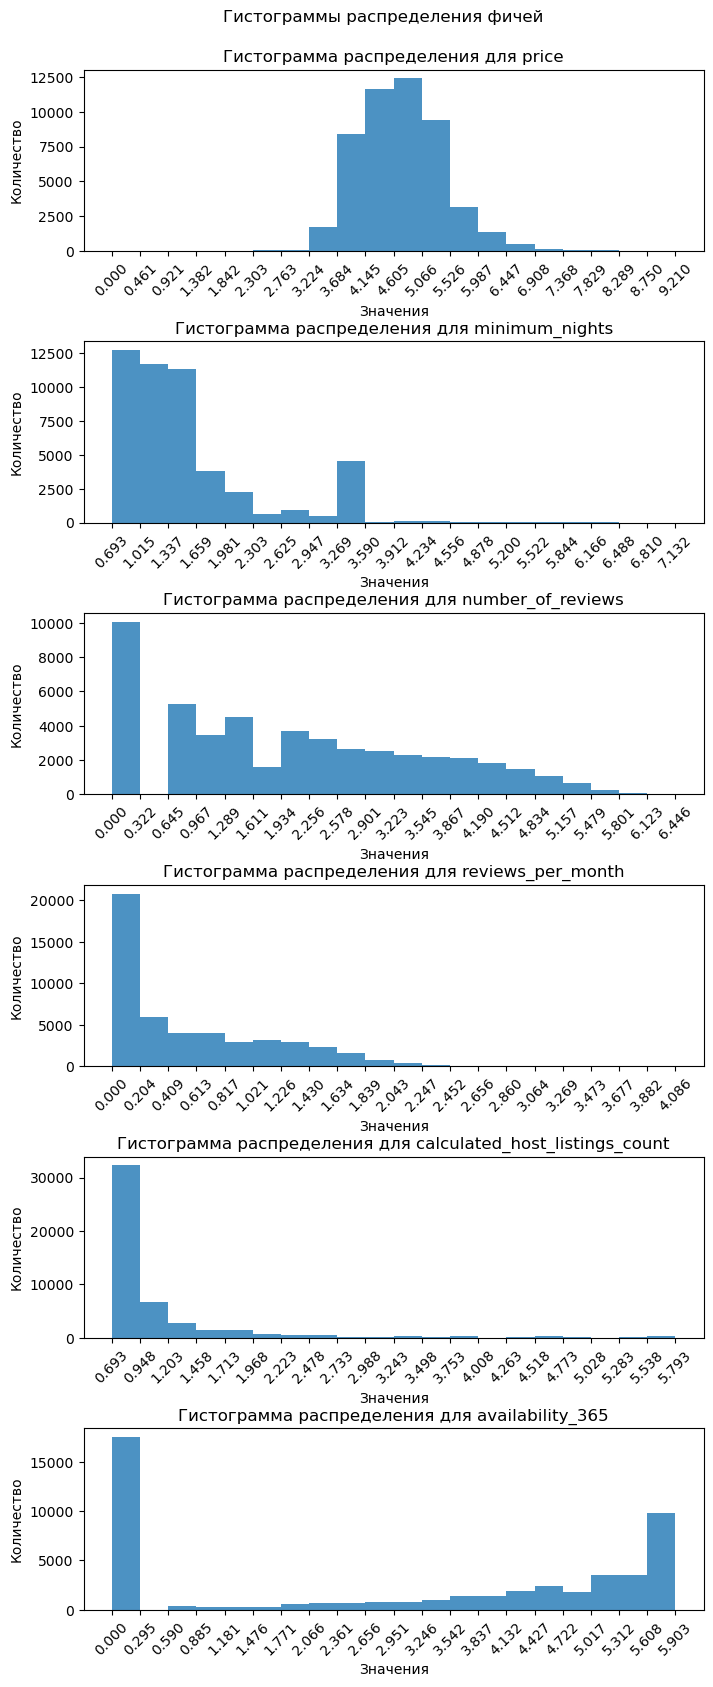

In [15]:
fig, ax = plt.subplots(nrows= 6, ncols= 1, figsize = (8, 20))

data_s = list(log_df.columns)

for i, feature in enumerate(data_s):
        data_S = log_df[feature]
        _,bins,_ = ax[i].hist(data_S, label = feature, alpha = 0.8, bins = 20)
        ax[i].set_title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª—è ' + feature, y = 1)
        ax[i].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
        ax[i].set_xticks(bins)
        ax[i].tick_params(axis='x', rotation = 45)
        ax[i].set_xlabel('–ó–Ω–∞—á–µ–Ω–∏—è')
                
fig.suptitle('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ñ–∏—á–µ–π', y = 0.91)
plt.subplots_adjust(hspace = 0.5)
plt.show()

#### StandardScaler

In [1]:
x_scaler =  StandardScaler() #—Å–æ–∑–¥–∞—Ç—å —ç–∫–∑–µ–º–ø–ª—è—Ä –∫–ª–∞—Å—Å–∞ scaler=StandardScaler()
data_s = ['price','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365']
df_for_normal = df[data_s]
stand_scaled_df = x_scaler.fit_transform(df_for_normal)
print(stand_scaled_df.shape)

NameError: name 'StandardScaler' is not defined

In [17]:
stand_scaled_df = pd.DataFrame(stand_scaled_df, columns=['price','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365'])
stand_scaled_df.head(3)

price  minimum_nights  number_of_reviews  reviews_per_month  \
0 -0.015493       -0.293996          -0.320414          -0.551511   
1  0.300974       -0.293996           0.487665          -0.445079   
2 -0.011329       -0.196484          -0.522433          -0.682986   

   calculated_host_listings_count  availability_365  
0                       -0.034716          1.916250  
1                       -0.156104          1.840275  
2                       -0.186451          1.916250

–í–º–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ—Å–ª–µ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏.

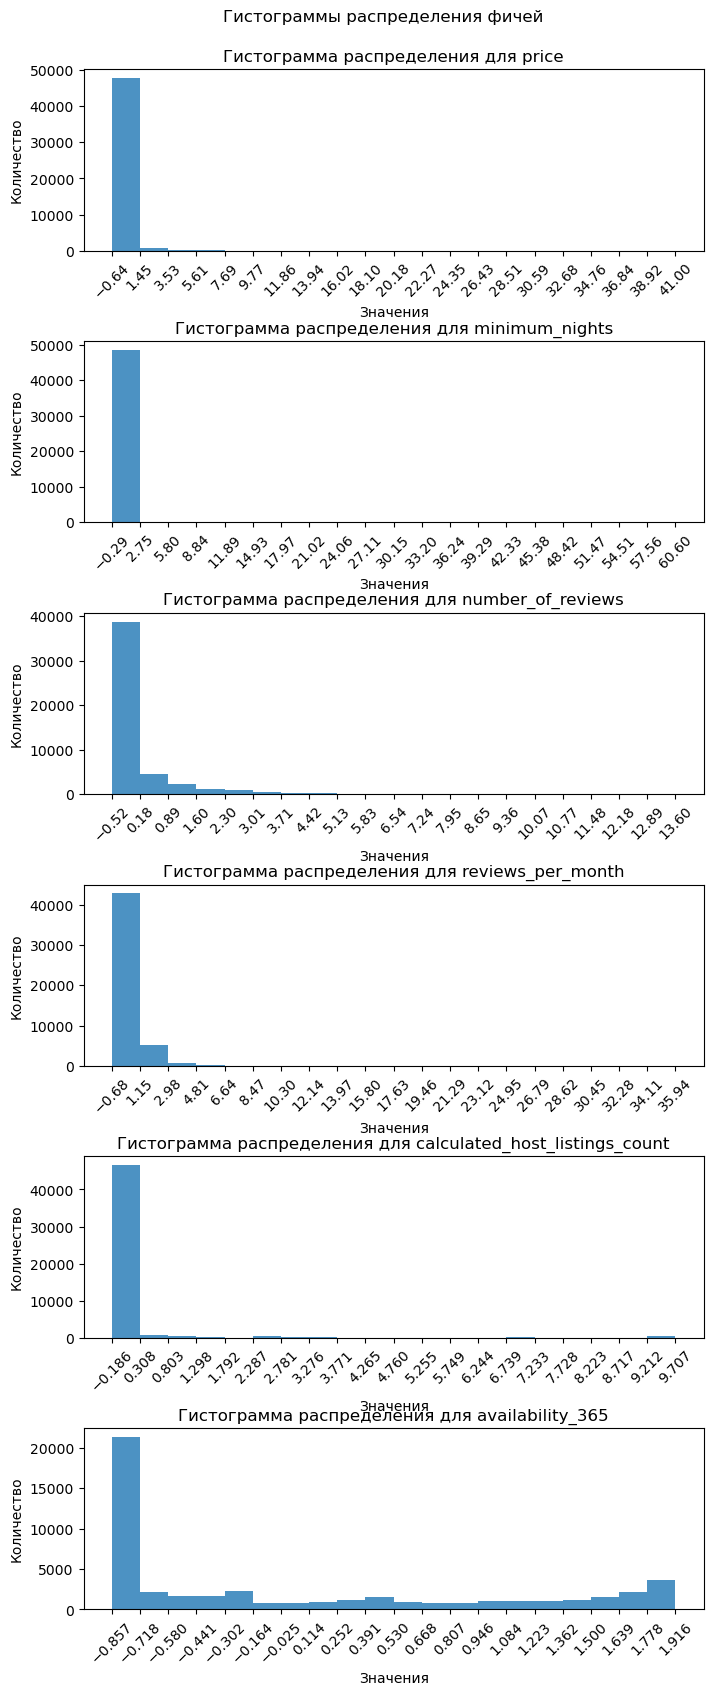

In [18]:
fig, ax = plt.subplots(nrows= 6, ncols= 1, figsize = (8, 20))

data_s = list(stand_scaled_df.columns)

for i, feature in enumerate(data_s):
        data_S = stand_scaled_df[feature]
        _,bins,_ = ax[i].hist(data_S, label = feature, alpha = 0.8, bins = 20)
        ax[i].set_title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª—è ' + feature, y = 1)
        ax[i].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
        ax[i].set_xticks(bins)
        ax[i].tick_params(axis='x', rotation = 45)
        ax[i].set_xlabel('–ó–Ω–∞—á–µ–Ω–∏—è')
                
fig.suptitle('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ñ–∏—á–µ–π', y = 0.91)
plt.subplots_adjust(hspace = 0.5)
plt.show()

#### min-max normalization

–î—Ä—É–≥–æ–π —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—ë–Ω–Ω—ã–π –º–µ—Ç–æ–¥ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è MinMax Scaling. –≠—Ç–æ—Ç –º–µ—Ç–æ–¥ –ø–µ—Ä–µ–Ω–æ—Å–∏—Ç –≤—Å–µ —Ç–æ—á–∫–∏ –Ω–∞ –æ—Ç—Ä–µ–∑–æ–∫ [0;1]

In [2]:
x_min_max_norm =  MinMaxScaler() #—Å–æ–∑–¥–∞—Ç—å —ç–∫–∑–µ–º–ø–ª—è—Ä –∫–ª–∞—Å—Å–∞ scaler=StandardScaler()
data_s = ['price','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365']
df_for_normal = df[data_s]
min_max_df = x_min_max_norm.fit_transform(df_for_normal)
print(min_max_df.shape)

NameError: name 'MinMaxScaler' is not defined

In [20]:
min_max_df = pd.DataFrame(min_max_df, columns=['price','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365'])
min_max_df.head(3)

price  minimum_nights  number_of_reviews  reviews_per_month  \
0  0.0149        0.000000           0.014308           0.003590   
1  0.0225        0.000000           0.071542           0.006496   
2  0.0150        0.001601           0.000000           0.000000   

   calculated_host_listings_count  availability_365  
0                        0.015337          1.000000  
1                        0.003067          0.972603  
2                        0.000000          1.000000

–í–º–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ—Å–ª–µ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏.

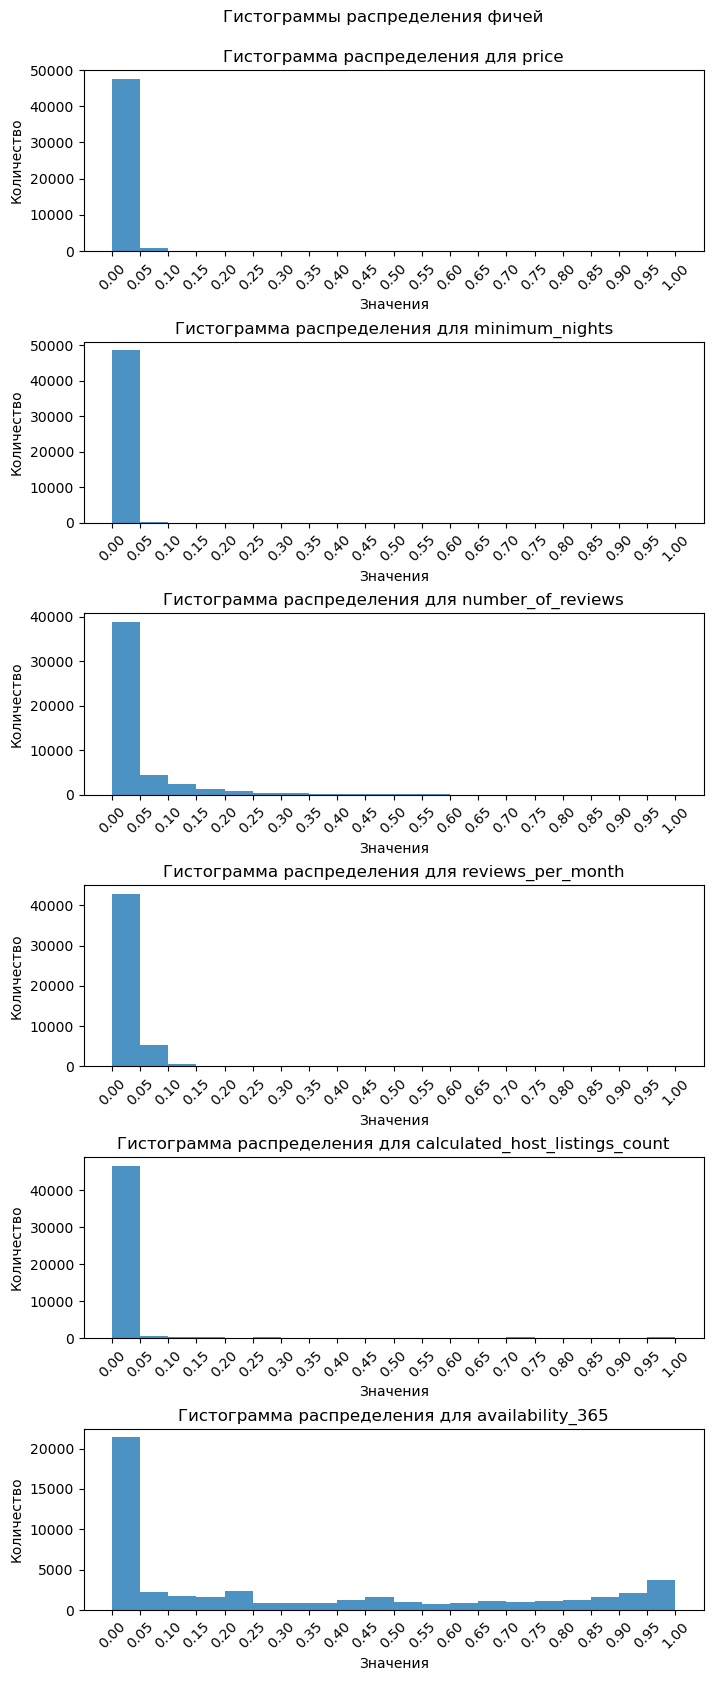

In [21]:
fig, ax = plt.subplots(nrows= 6, ncols= 1, figsize = (8, 20))

data_s = list(min_max_df.columns)

for i, feature in enumerate(data_s):
        data_S = min_max_df[feature]
        _,bins,_ = ax[i].hist(data_S, label = feature, alpha = 0.8, bins = 20)
        ax[i].set_title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª—è ' + feature, y = 1)
        ax[i].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
        ax[i].set_xticks(bins)
        ax[i].tick_params(axis='x', rotation = 45)
        ax[i].set_xlabel('–ó–Ω–∞—á–µ–Ω–∏—è')
                
fig.suptitle('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ñ–∏—á–µ–π', y = 0.91)
plt.subplots_adjust(hspace = 0.5)
plt.show()

# 7.–ü–æ–¥–µ–ª–∏–º –≤–µ—Å—å –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Ç—Ä–∏ —á–∞—Å—Ç–∏: –æ–±—É—á–∞—é—â—É—é, –ø—Ä–æ–≤–µ—Ä–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é.

#### –ù–∞–ø–∏—à–µ–º —Ñ—É–≥–∫—Ü–∏—é –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é

In [22]:
def split_data(data):
    n = len(data)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    np.random.seed(3) #—Ñ–∏–∫—Å–∏—Ä—É–µ–º –Ω–∞—á–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    idx = np.arange(n)
    np.random.shuffle(idx) #—Å–æ–∑–¥–∞–µ–º –º–∞—Å—Å–∏–≤ —Å –∏–Ω–¥–µ–∫—Å–∞–º–∏ –æ—Ç 0 –¥–æ —Ç-1 –∏ –ø–µ—Ä–µ—Ç–∞—Å–æ–≤—ã–≤–∞–µ–º –µ–≥–æ
    df_shuffled = data.iloc[idx] #–∏—Å–ø–æ–ª—å–∑—É–µ–º –º–∞—Å—Å–∏–≤ —Å –∏–Ω–¥–µ–∫—Å–∞–º–∏ –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –ø–µ—Ä–µ—Ç–∞—Å–æ–≤–∞–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    y_train = df_train['price']
    del df_train['price']
    y_val = df_val['price']
    del df_val['price']
    y_test = df_test['price']
    del df_test['price']
    return df_train, y_train, df_val, y_val, df_test, y_test

#### –î–∞–Ω–Ω—ã–µ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è:

In [23]:
data = df[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
df_train, y_train, df_val, y_val, df_test, y_test = split_data(data)

#### –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ

In [24]:
log_df_train, log_y_train, log_df_val, log_y_val, log_df_test, log_y_test = split_data(log_df)

#### Standart Scaling –∏–ª–∏ Z-score nirmalization

In [25]:
sc_df_train, sc_y_train, sc_df_val, sc_y_val, sc_df_test, sc_y_test = split_data(stand_scaled_df)

#### Min - Max normalization

In [26]:
mm_df_train, mm_y_train, mm_df_val, mm_y_val, mm_df_test, mm_y_test = split_data(min_max_df)

# 8.–£ –Ω–∞—Å –µ—Å—Ç—å –µ—â–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, –∑–∞–¥–µ–π—Å—Ç–≤—É–µ–º –∏ –∏—Ö!

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –Ω–∞ –º–æ–π –≤–∑–≥–ª—è–¥ –¥–∞–Ω–Ω—ã—Ö –∫–æ—Ç–æ—Ä—ã–µ —è–≤–Ω–æ –º–æ–≥—É—Ç –≤–ª—è–∏—è—Ç—å –Ω–∞ —Ü–µ–Ω—É.

In [27]:
pd.DataFrame(df.room_type.unique())

0
0     Private room
1  Entire home/apt
2      Shared room

In [28]:
pd.DataFrame(df.neighbourhood_group.unique())

0
0       Brooklyn
1      Manhattan
2         Queens
3  Staten Island
4          Bronx

In [29]:
pd.DataFrame(df.neighbourhood.unique())

0
0      Kensington
1         Midtown
2          Harlem
3    Clinton Hill
4     East Harlem
..            ...
216   Bull's Head
217      New Dorp
218     Rossville
219  Breezy Point
220   Willowbrook

[221 rows x 1 columns]

–ò–∑ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ç–∏–ø –∫–æ–º–Ω–∞—Ç—ã –∏ —Ä–∞–π–æ–Ω. 

In [30]:
def prepare_cat_featues(df):
    base = ['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365','room_type','neighbourhood_group']
    df = df.copy()
    features = base.copy()
    
    for v in ['Private room', 'Entire home/apt', 'Shared room']: #–ø–µ—Ä–µ—á–∏—Å–ª—è–µ–º –Ω–∞—à–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
        feature = 'type_obj_%s' % v
        df[feature] = (df['room_type'] == v).astype(int)
        features.append(feature)

    for v in ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']: #–ø–µ—Ä–µ—á–∏—Å–ª—è–µ–º –Ω–∞—à–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
        feature = 'neighbourhood_%s' % v
        df[feature] = (df['neighbourhood_group'] == v).astype(int)
        features.append(feature)
        
    total_df = df[features]
    return total_df

In [31]:
df_more_fit = prepare_cat_featues(df)
del df_more_fit['room_type']
del df_more_fit['neighbourhood_group']
df_more_fit.head(4)

price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0               0.00   
3     89               1                270               4.64   

   calculated_host_listings_count  availability_365  type_obj_Private room  \
0                               6               365                      1   
1                               2               355                      0   
2                               1               365                      1   
3                               1               194                      0   

   type_obj_Entire home/apt  type_obj_Shared room  neighbourhood_Brooklyn  \
0                         0                     0                       1   
1                         1                     0                       0   
2                         0                     0                       0   
3                         1                     0                       1   

   neighbourhood_Manhattan  neighbourhood_Queens  neighbourhood_Staten Island  \
0                        0                     0                            0   
1                        1                     0                            0   
2                        1                     0                            0   
3                        0                     0                            0   

   neighbourhood_Bronx  
0                    0  
1                    0  
2                    0  
3                    0

#### –†–µ–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ä–µ–¥—Å—Ç–≤–∞–º–∏ SkLearn

One-Hot encoding
–î–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –≤ —á–∏—Å–ª–æ–≤—ã–µ –º–æ–∂–Ω–æ –ø—Ä–∏–º–µ–Ω—è—Ç—å –º–µ—Ç–æ–¥ One-Hot encoding. –ï–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º —Å–ª–µ–¥—É—é—â–∏–π:

* –î–ª—è –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π —Å–æ–∑–¥–∞–µ—Ç—Å—è –≤–µ–∫—Ç–æ—Ä.
* –î–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ –≤–µ–∫—Ç–æ—Ä–∞ –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏–µ 1, –µ—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —ç—Ç–æ–º—É –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—É, –∏ 0, –µ—Å–ª–∏ –Ω–µ—Ç.
* –í–µ–∫—Ç–æ—Ä—ã –æ–±—ä–µ–¥–∏–Ω—è—é—Ç—Å—è –≤ –µ–¥–∏–Ω—ã–π –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö.

In [32]:
# –ü—Ä–∏–º–µ–Ω—è–µ–º One-Hot encoding —Å –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏–∏ get_dummies
base = ['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365','room_type','neighbourhood_group']
df_for_example = df[base]
one_hot_encoded = pd.get_dummies(df_for_example, columns=['room_type', 'neighbourhood_group'], dtype = int) #–∑–∞–ø–æ–ª–Ω—è–µ—Ç –Ω—É–ª—è–º–∏ –∏ –µ–¥–∏–Ω–∏—Ü–∞–º–∏
one_hot_encoded.head(4)

price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0               0.00   
3     89               1                270               4.64   

   calculated_host_listings_count  availability_365  \
0                               6               365   
1                               2               355   
2                               1               365   
3                               1               194   

   room_type_Entire home/apt  room_type_Private room  room_type_Shared room  \
0                          0                       1                      0   
1                          1                       0                      0   
2                          0                       1                      0   
3                          1                       0                      0   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                          0                             1   
1                          0                             0   
2                          0                             0   
3                          0                             1   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                              0                           0   
1                              1                           0   
2                              1                           0   
3                              0                           0   

   neighbourhood_group_Staten Island  
0                                  0  
1                                  0  
2                                  0  
3                                  0

In [33]:
one_hot_encoded.shape

(48895, 14)

# 9.–ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ —Å–ø–æ—Å–æ–±–∞–º–∏ –Ω–∞—à –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º–∏ —Ñ–∏—á–∞–º–∏.

**–í–∞–∂–Ω–æ** –ü—Ä–∏–º–µ–Ω—è—Ç—å –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –ø–æ–¥–æ–±–Ω—ã–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏–∏ –∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º/‚Äù–±—É–ª–µ–≤—ã–º‚Äù –ø—Ä–∏–∑–Ω–∞–∫–∞–º –∫–∞–∫ –º–∏–Ω–∏–º—É–º –±–µ—Å–ø–æ–ª–µ–∑–Ω–æ, –∞ –∫–∞–∫ –º–∞–∫—Å–∏–º—É–º ‚Äî –≤—Ä–µ–¥–Ω–æ. –ü–æ—Å–∫–æ–ª—å–∫—É –º–æ–∂–µ—Ç –Ω–µ–æ–±–æ—Å–Ω–æ–≤–∞–Ω–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å –∏–ª–∏ —É–º–µ–Ω—å—à–∏—Ç—å –∏—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª –∑–Ω–∞—á–µ–Ω–∏–π. –ü–æ—ç—Ç–æ–º—É –º—ã –ø—Ä–æ—Å—Ç–æ –ø—Ä–∏—Å–æ–¥–∏–Ω–∏–º –¥–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –∫ —É–∂–µ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º.

#### –°–æ–µ–¥–∏–Ω—è–µ–º —Å –¥–∞–Ω–Ω—ã–º–∏ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è

In [34]:
data.shape

(48895, 6)

In [35]:
merged_df = pd.merge(data, one_hot_encoded.iloc[:,-8:-1], left_index=True, right_index=True)

In [36]:
merged_df_train, merged_df_Y_train, merged_df_val, merged_df_Y_val, merged_df_test, merged_df_Y_test = split_data(merged_df)

#### –°–æ–µ–¥–∏–Ω—è–µ–º —Å –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏

In [37]:
log_df.shape

(48895, 6)

In [38]:
merged_log_df = pd.merge(log_df, one_hot_encoded.iloc[:,-8:-1], left_index=True, right_index=True)

In [39]:
merged_log_df_train, merged_log_df_Y_train, merged_log_df_val, merged_log_df_Y_val, merged_log_df_test, merged_log_df_Y_test = split_data(merged_log_df)

#### –°–æ–¥–∏–Ω—è–µ–º —Å –¥–∞–Ω–Ω—ã–º–∏ Stand scaled

In [40]:
stand_scaled_df.shape

(48895, 6)

In [41]:
merged_stand_scaled_df = pd.merge(stand_scaled_df, one_hot_encoded.iloc[:,-8:-1], left_index=True, right_index=True)

In [42]:
merged_stand_scaled_df_train, merged_stand_scaled_df_Y_train, merged_stand_scaled_df_val, merged_stand_scaled_df_Y_val, merged_stand_scaled_df_test, merged_stand_scaled_df_Y_test = split_data(merged_stand_scaled_df)

#### –°–æ–µ–¥–∏–Ω—è–µ–º —Å –¥–∞–Ω–Ω—ã–º–∏ min - max normalizetion

In [43]:
min_max_df.shape

(48895, 6)

In [44]:
merged_min_max_df = pd.merge(min_max_df, one_hot_encoded.iloc[:,-8:-1], left_index=True, right_index=True)

In [45]:
merged_min_max_df_train, merged_min_max_df_Y_train, merged_min_max_df_val, merged_min_max_df_Y_val, merged_min_max_df_test, merged_min_max_df_Y_test = split_data(merged_min_max_df)

# 10.–û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏.

#### –†–µ–∞–ª–∏–∑—É–µ–º –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é —Å –ø–æ–º–æ—â—å—é NumPy

In [46]:
def train_linear_regression(X, y):
    #—Å–æ–∑–¥–∞–Ω–∏–µ –º–∞—Å—Å–∏–≤ –µ–¥–∏–Ω–∏—Ü
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]) # –¥–æ–±–∞–≤–ª—è–µ–º –º–∞—Å—Å–∏–≤ –∏–∑ –µ–¥–∏–Ω–∏—Ü –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø–µ—Ä–≤–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞
    #–§–æ—Ä–º—É–ª–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —É—Ä–∞–≤–Ω–µ–Ω–∏—è
    XTX = X.T.dot(X) # –º–∞—Ç—Ä–∏—á–Ω–æ–µ –ø–µ—Ä–µ–º–Ω–æ–∂–µ–Ω–∏–µ –• —Å —Ç—Ä–∞–Ω—Å–ø–æ–Ω–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –•
    XTX_inv = np.linalg.inv(XTX) # –≤—ã—á–∏—Å–ª—è–µ–º –æ–±—Ä–∞—Ç–Ω—É—é –≤–µ–ª–∏—á–∏–Ω—É –•
    w = XTX_inv.dot(X.T).dot(y) 
    return w[0], w[1:]

–ü–æ–ª—É—á–∏–º –≤–µ—Å–æ–≤—ã–µ –∫–æ—ç—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –∏ —Å–º–µ—â–µ–Ω–∏–µ

In [47]:
w_0, w = train_linear_regression(merged_df_train,merged_df_Y_train)

–ü–æ–ª—É—á–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ

In [48]:
y_pred = w_0 + merged_df_train.dot(w)

–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –Ω–∞—à–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ

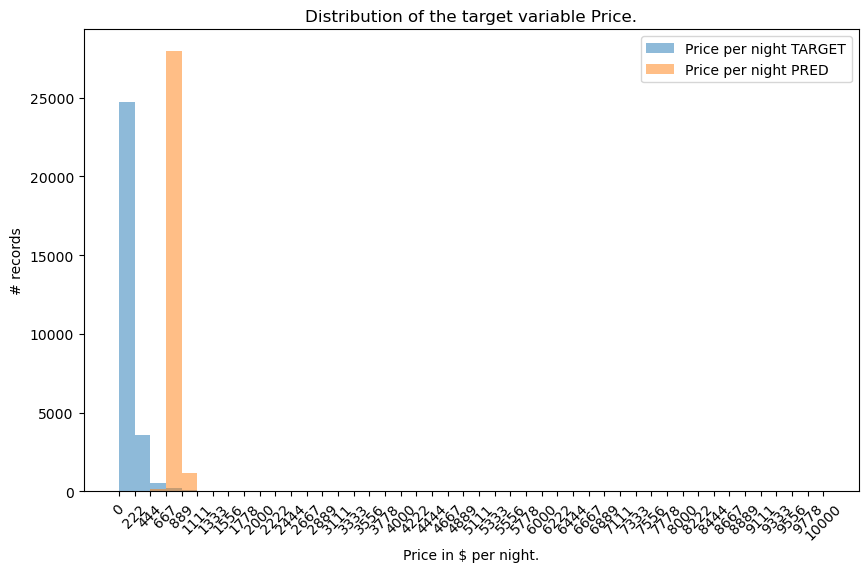

In [49]:
data0 = merged_df_Y_train
data1 = y_pred


fig, ax = plt.subplots(figsize = (10,6))

_,bins,_ = ax.hist(data0, label = 'Price per night TARGET', alpha = 0.5, bins = 45)
ax.hist(data1, label = 'Price per night PRED', alpha = 0.5, bins = bins)

ax.set_title('Distribution of the target variable Price.')
ax.set_xlabel('Price in $ per night.')
ax.set_ylabel('# records')
ax.set_xticks(bins)
ax.tick_params(axis='x', rotation = 45)
ax.legend()
plt.show()

#### RMSE –æ—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏.

–ò —Ç–∞–∫ –ø–æ—Å–∫–æ–ª—å–∫—É –Ω–∞–º –Ω—É–∂–Ω–æ –±—É–¥–µ—Ç –ø–æ—Å—Ç–æ—è–Ω–Ω–æ —á—Ç–æ-—Ç–æ –º–µ–Ω—è—Ç—å –≤ –º–æ–¥–µ–ª–∏, –¥–ª—è –µ–µ —É–ª—É—á—à–µ–Ω–∏—è —Ç–æ –Ω–∞–º –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è –µ–µ –æ—Ü–µ–Ω–∏–≤–∞—Ç—å. –ß–∞—â–µ –≤—Å–µ–≥–æ —Å –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π –∏—Å–ø–æ–ª—å–∑—É—é—Ç –∫–æ—Ä–µ–Ω—å —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏ RMSE.

In [50]:
def rmse(y_target, y_pred):
    error = y_pred - y_target
    mse = (error ** 2).mean()
    return np.sqrt(mse)

–ü–æ–ª—É—á–∏–º –æ—à–∏–±–∫—É –∏–∑ –Ω–∞—à–∏—Ö —Ä–∞–Ω–µ–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

In [51]:
RMSE1 = rmse(merged_df_Y_train, y_pred)
RMSE1

669.8921184131194

–ü–æ–ª—É—á–∞–µ–º 669.89 —ç—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –≤ —Å—Ä–µ–¥–Ω–µ–º –ø—Ä–æ–≥–Ω–æ–∑—ã –º–æ–¥–µ–ª–∏ –æ—Ç–∫–ª–æ–Ω—è—é—Ç—Å—è –Ω–∞ 669.89. –ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç—Ç—É –º–µ—Ç—Ä–∏–∫—É –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–∞–∑–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π.

#### Mean square error

Mean square error - —ç—Ç–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –∏—Å—Ç–∏–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π. **–ß–µ–º –±–ª–∏–∂–µ –∫ –Ω—É–ª—é —Ç–µ–º –ª—É—á—à–µ!** –°–∏–ª—å–Ω–µ–µ —à—Ç—Ä–∞—Ñ—É–µ—Ç –∑–∞ –±–æ–ª—å—à–∏–µ –æ—à–∏–±–∫–∏–µ, —á–µ–º —Ñ—É–Ω–∫—Ü–∏—è MAE. T.e. –µ—Å–ª–∏ –µ—Å—Ç—å –≤—ã–±—Ä–æ—Å—ã, —Ç–æ –º–æ–∂–Ω–æ –ø–æ–¥—É–º–∞—Ç—å, —á—Ç–æ –º–æ–¥–µ–ª—å –ø–ª–æ—Ö–æ –æ–±—É—á–∏–ª–∞—Å—å. –ò –µ—Å–ª–∏ —É–±—Ä–∞—Ç—å –≤—ã–±—Ä–æ—Å—ã - —Ç–æ –º–µ—Ç—Ä–∏–∫–∞ —Å–∏–ª—å–Ω–æ —É–ª—É—á—à–∏—Ç—Å—è.

In [52]:
MSE = mean_squared_error(merged_df_Y_train,y_pred, squared=True) #(–ï—Å–ª–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä squared —Ä–∞–≤–µ–Ω True ‚Äî –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è MSE, –µ—Å–ª–∏ False ‚Äî RMSE).
MSE

448755.45031201676

In [53]:
RMSE = mean_squared_error(merged_df_Y_train,y_pred, squared=False) #(–ï—Å–ª–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä squared —Ä–∞–≤–µ–Ω True ‚Äî –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è MSE, –µ—Å–ª–∏ False ‚Äî RMSE).
RMSE

669.8921184131194

#### MAE

MSE, –≤ –æ—Ç–ª–∏—á–∏–∏ –æ—Ç MAE, –±–æ–ª–µ–µ ¬´–ø–µ—Å—Å–∏–º–∏—Å—Ç–∏—á–Ω–∞¬ª –∏ —Å–∏–ª—å–Ω–µ–µ —à—Ç—Ä–∞—Ñ—É–µ—Ç –∑–∞ –±–æ–ª—å—à–∏–µ –æ—à–∏–±–∫–∏ ‚Äî —Ç–æ –µ—Å—Ç—å MSE –ª—É—á—à–µ –ø—Ä–∏–º–µ–Ω—è—Ç—å, –∫–æ–≥–¥–∞ –≤—ã —É–≤–µ—Ä–µ–Ω—ã, —á—Ç–æ –≤ –≤—ã–±–æ—Ä–∫–µ –Ω–µ—Ç ¬´–≤—ã–±—Ä–æ—Å–æ–≤¬ª (–æ—Ç –∞–Ω–≥–ª. outliers) ‚Äî –∑–Ω–∞—á–µ–Ω–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö —Ç–æ—á–µ–∫. –í —ç—Ç–æ–º —Å–ª—É—á–∞–µ MSE –º–æ–∂–µ—Ç –±—ã—Ç—å –æ—á–µ–Ω—å –ø–ª–æ—Ö–æ–π, –Ω–æ —Å–∏—Ç—É–∞—Ü–∏—è –ø—Ä–∏ —ç—Ç–æ–º –ø—Ä–∏–µ–º–ª–µ–º–æ–π. **–ï—Å–ª–∏ ¬´–≤—ã–±—Ä–æ—Å—ã¬ª –µ—Å—Ç—å, –ª—É—á—à–µ –ø—Ä–∏–º–µ–Ω—è—Ç—å MAE.**

In [54]:
MAE = mean_absolute_error(merged_df_Y_train,y_pred)
MAE

640.6687687607894

#### $R^2$ (–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏)

–ù–∞–∑–≤–∞–Ω–∏–µ - –∫–∞–ª—å–∫–∞ –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ —Ç–µ—Ä–º–∏–Ω–∞ *coefficient of determination*. **–ù–∞–∏–ª—É—á—à–µ–µ –≤–æ–∑–º–æ–∂–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ 1.0**, —á–µ–º –º–µ–Ω—å—à–µ —Ç–µ–º —Ö—É–∂–µ. –ï—Å–ª–∏ —ç—Ç–æ—Ç –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –±–ª–∏–∑–æ–∫ –∫ 1, —Ç–æ —É—Å–ª–æ–≤–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è –º–æ–¥–µ–ª–∏ (—Ç–æ –µ—Å—Ç—å —Ä–∞–∑–±—Ä–æ—Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –º–æ–¥–µ–ª–∏ $\hat{y}$ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ä–∞–∑–±—Ä–æ—Å–∞ —Å–∞–º–æ–π —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π $y$ ) –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –º–∞–ª–∞ - —Ç–æ –µ—Å—Ç—å –º–æ–¥–µ–ª—å –Ω–µ–ø–ª–æ—Ö–æ –æ–ø–∏—Å—ã–≤–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ. –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –º–æ–∂–µ—Ç –±—ã—Ç—å –¥–∞–∂–µ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–º - —Ç–æ —ç—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –º–æ–¥–µ–ª—å —Å–æ–≤—Å–µ–º —É–∂ –ø–ª–æ—Ö–∞—è.

–≠—Ç–∞ –º–µ—Ç—Ä–∏–∫–∞ —Ö–æ—Ä–æ—à–∞ —Ç–µ–º, —á—Ç–æ –æ–Ω–∞ *–Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–∞*, —Ç–æ –µ—Å—Ç—å –Ω–µ –ø—Ä–µ–≤—ã—à–∞–µ—Ç –µ–¥–∏–Ω–∏—Ü—É - —É–¥–æ–±–Ω–æ —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å —Ä–∞–∑–Ω—ã–µ –º–æ–¥–µ–ª–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –º–µ—Ç—Ä–∏–∫–∞ $MSE$ –º–æ–∂–µ—Ç –ø—Ä–∏–Ω–∏–º–∞—Ç—å –Ω–∏—á–µ–º –Ω–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –±–æ–ª—å—à–µ –Ω—É–ª—è - —ç—Ç–æ –Ω–µ –≤—Å–µ–≥–¥–∞ —É–¥–æ–±–Ω–æ.

In [55]:
r2score = r2_score(merged_df_Y_train,y_pred)
r2score

-6.395932664515678

# 11.–ù–∞–ø–∏—à–µ–º –∫–ª–∞—Å—Å –∫–æ—Ç–æ—Ä—ã–π —Ä–µ–∞–ª–∏–∑—É–µ—Ç –º–æ–¥–µ–ª—å –∏ —Å–æ–¥–µ—Ä–∂–∏—Ç —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ –ø–æ–¥—Å—á–µ—Ç—É –º–µ—Ç—Ä–∏–∫.

–°—É—â–µ—Å—Ç–≤—É–µ—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–æ –±–∏–±–ª–∏–æ—Ç–µ–∫ —è–∑—ã–∫–∞ Python —Å –Ω–∞–¥–µ–∂–Ω—ã–º–∏
—Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è–º–∏ —à–∏—Ä–æ–∫–æ–≥–æ –¥–∏–∞–ø–∞–∑–æ–Ω–∞ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è,
–∫–æ—Ç–æ—Ä—ã–µ –º–æ–∂–Ω–æ —É—Å–ª–æ–≤–Ω–æ —Ä–∞–∑–¥–µ–ª–∏—Ç—å –Ω–∞ —Ç—Ä–∏ –≥—Ä—É–ø–ø—ã: 1) –±–∏–±–ª–∏–æ—Ç–µ–∫–∏,
–ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω–Ω—ã–µ –¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è Python —Å —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—è–º–∏ –±–æ–ª—å—à–∏—Ö
–¥–∞–Ω–Ω—ã—Ö (PySpark, PyDoop, Hadoopy); 2) –±–∏–±–ª–∏–æ—Ç–µ–∫–∏, –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω–Ω—ã–µ
–¥–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –∫–æ–¥–∞ (PyCUDA, Cython, Blaze, PP, Dispy, IPCluster –∏
–¥—Ä—É–≥–∏–µ); 3) –±–∏–±–ª–∏–æ—Ç–µ–∫–∏, –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω–Ω—ã–µ –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –¥–∞–Ω–Ω—ã–º–∏ (Pandas, matplottib, NumPy, SymPy, SciPy, Scikit-Learn, TensorFlow, StatsModels, RPy2, NLTK –∏ –¥—Ä—É–≥–∏–µ).

#### –ü–æ–ø—Ä–æ–±—É–µ–º —Å–¥–µ–ª–∞—Ç—å —Ç–æ–∂–µ —Å–∞–º–æ–µ —Å –ø–æ–º–æ—â—å—é –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ Scikit-Learn

In [56]:
class LinReg:
    def __init__(self, df_train, y_train, df_val, y_val, df_test, y_test, name):
        self.df_train = df_train
        self.y_train = y_train
        self.df_val = df_val
        self.y_val = y_val
        self.df_test = df_test
        self.y_test = y_test
        self.model = LinearRegression()
        self.name = name

    def fit(self):
        self.model.fit(self.df_train, self.y_train)
        print('–ú–æ–¥–µ–ª—å {model}, –æ–±—É—á–µ–Ω–∞.'.format(model=self.name))

    def predict(self):
        return self.model.predict(self.df_val)

    def loss(self):
        MSE = mean_squared_error(self.predict(), self.y_val, squared=True)
        RMSE = mean_squared_error(self.predict(), self.y_val, squared=False)
        MAE = mean_absolute_error(self.predict(), self.y_val)
        r2score = r2_score(self.predict(), self.y_val)
        print('–ú–æ–¥–µ–ª—å {model_name}.\n'.format(model_name=self.name))
        print('–û—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:\n'
              'MSE: {MSE} –õ—É—á—à–µ –ø—Ä–∏–º–µ–Ω—è—Ç—å, –∫–æ–≥–¥–∞ –≤—ã–±–æ—Ä–∫–µ –Ω–µ—Ç ¬´–≤—ã–±—Ä–æ—Å–æ–≤¬ª (–æ—Ç –∞–Ω–≥–ª. outliers)\n'
              'RMSE: {RMSE} –ß–µ–º –±–ª–∏–∂–µ –∫ –Ω—É–ª—é —Ç–µ–º –ª—É—á—à–µ! –ï—Å–ª–∏ —É–±—Ä–∞—Ç—å –≤—ã–±—Ä–æ—Å—ã - —Ç–æ –º–µ—Ç—Ä–∏–∫–∞ —Å–∏–ª—å–Ω–æ —É–ª—É—á—à–∏—Ç—Å—è.\n'
              'MAE: {MAE} –ï—Å–ª–∏ ¬´–≤—ã–±—Ä–æ—Å—ã¬ª –µ—Å—Ç—å, –ª—É—á—à–µ –ø—Ä–∏–º–µ–Ω—è—Ç—å MAE.\n'
              'r2score: {r2score} –ù–∞–∏–ª—É—á—à–µ–µ –≤–æ–∑–º–æ–∂–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ 1.0. –ï—Å–ª–∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π - –º–æ–¥–µ–ª—å —Å–æ–≤—Å–µ–º —É–∂ –ø–ª–æ—Ö–∞—è.'
              '\n'.format(MSE=MSE, RMSE=RMSE, MAE=MAE, r2score=r2score))

**–û–±—É—á–∏–º –º–æ–¥–µ–ª—å –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏  –Ω–∞ –≤—Å–µ—Ö –Ω–∞—à–∏—Ö –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (–≤—Å–µ–≥–æ —É –Ω–∞—Å 8 –Ω–∞–±–æ—Ä–æ–≤) –∏ –≤—ã–≤–µ–¥–∏–º –º–µ—Ç—Ä–∏–∫–∏.**

#### –î–∞–Ω–Ω—ã–µ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è:

In [57]:
d_1 = {'df_train':df_train, 'y_train':y_train,
       'df_val':df_val,'y_val':y_val,
       'df_test':df_test,'y_test':y_test,
       'name':'–ù–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ',
      'object':'d_1'}

#### –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ

In [58]:
d_2 = {'df_train':log_df_train, 'y_train':log_y_train,
       'df_val':log_df_val,'y_val':log_y_val,
       'df_test':log_df_test,'y_test':log_y_test,
       'name':'–õ–æ–≥–æ—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ',
      'object':'d_2'}

#### Standart Scaling –∏–ª–∏ Z-score nirmalization

In [59]:
d_3 = {'df_train':sc_df_train, 'y_train':sc_y_train,
       'df_val':sc_df_val,'y_val':sc_y_val,
       'df_test':sc_df_test,'y_test':sc_y_test,
       'name':'Standart Scaling –∏–ª–∏ Z-score nirmalization',
      'object':'d_3'}

#### Min - Max normalization

In [60]:
d_4 = {'df_train':mm_df_train, 'y_train':mm_y_train,
       'df_val':mm_df_val,'y_val':mm_y_val,
       'df_test':mm_df_test,'y_test':mm_y_test,
       'name':'Min - Max normalization',
      'object':'d_4'}

#### –î–∞–Ω–Ω—ã–µ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏

In [61]:
d_1_1 = {'df_train':merged_df_train, 'y_train':merged_df_Y_train,
       'df_val':merged_df_val,'y_val':merged_df_Y_val,
       'df_test':merged_df_test,'y_test':merged_df_Y_test,
       'name':'–î–∞–Ω–Ω—ã–µ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏',
      'object':'d_1_1'}

#### –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º—ã–µ –¥–∞–Ω–Ω—ã–µ —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏

In [62]:
d_2_1 = {'df_train':merged_log_df_train, 'y_train':merged_log_df_Y_train,
       'df_val':merged_log_df_val,'y_val':merged_log_df_Y_val,
       'df_test':merged_log_df_test,'y_test':merged_log_df_Y_test,
       'name':'–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º—ã–µ –¥–∞–Ω–Ω—ã–µ —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏',
      'object':'d_2_1'}

#### Standart Scaling –∏–ª–∏ Z-score nirmalization —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏

In [63]:
d_3_1 = {'df_train':merged_stand_scaled_df_train, 'y_train':merged_stand_scaled_df_Y_train,
       'df_val':merged_stand_scaled_df_val,'y_val':merged_stand_scaled_df_Y_val,
       'df_test':merged_stand_scaled_df_test,'y_test':merged_stand_scaled_df_Y_test,
       'name':'Standart Scaling –∏–ª–∏ Z-score nirmalization —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏',
      'object':'d_3_1'}

#### Min - Max normalization —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏

In [64]:
d_4_1 = {'df_train':merged_min_max_df_train, 'y_train':merged_min_max_df_Y_train,
       'df_val':merged_min_max_df_val,'y_val':merged_min_max_df_Y_val,
       'df_test':merged_min_max_df_test,'y_test':merged_min_max_df_Y_test,
       'name':'Min - Max normalization —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏',
      'object':'d_4_1'}

In [65]:
list_of_models =[d_1, d_2, d_3, d_4, d_1_1, d_2_1, d_3_1, d_4_1]

In [66]:
list_of_instance_class = []
for data in list_of_models:
    instace = LinReg(
        df_train = data.get('df_train'), 
        y_train = data.get('y_train'), 
        df_val = data.get('df_val'), 
        y_val = data.get('y_val'), 
        df_test = data.get('df_test'), 
        y_test = data.get('y_test'), 
        name = data.get('name')
    )
    instace.fit()
    instace.loss()
    list_of_instance_class.append(instace)   
    

–ú–æ–¥–µ–ª—å –ù–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, –æ–±—É—á–µ–Ω–∞.
–ú–æ–¥–µ–ª—å –ù–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ.

–û—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:
MSE: 75206.87857423659 –õ—É—á—à–µ –ø—Ä–∏–º–µ–Ω—è—Ç—å, –∫–æ–≥–¥–∞ –≤—ã–±–æ—Ä–∫–µ –Ω–µ—Ç ¬´–≤—ã–±—Ä–æ—Å–æ–≤¬ª (–æ—Ç –∞–Ω–≥–ª. outliers)
RMSE: 274.23872551891094 –ß–µ–º –±–ª–∏–∂–µ –∫ –Ω—É–ª—é —Ç–µ–º –ª—É—á—à–µ! –ï—Å–ª–∏ —É–±—Ä–∞—Ç—å –≤—ã–±—Ä–æ—Å—ã - —Ç–æ –º–µ—Ç—Ä–∏–∫–∞ —Å–∏–ª—å–Ω–æ —É–ª—É—á—à–∏—Ç—Å—è.
MAE: 91.00879167798686 –ï—Å–ª–∏ ¬´–≤—ã–±—Ä–æ—Å—ã¬ª –µ—Å—Ç—å, –ª—É—á—à–µ –ø—Ä–∏–º–µ–Ω—è—Ç—å MAE.
r2score: -84.25556723628864 –ù–∞–∏–ª—É—á—à–µ–µ –≤–æ–∑–º–æ–∂–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ 1.0. –ï—Å–ª–∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π - –º–æ–¥–µ–ª—å —Å–æ–≤—Å–µ–º —É–∂ –ø–ª–æ—Ö–∞—è.

–ú–æ–¥–µ–ª—å –õ–æ–≥–æ—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, –æ–±—É—á–µ–Ω–∞.
–ú–æ–¥–µ–ª—å –õ–æ–≥–æ—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ.

–û—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:
MSE: 0.4639693

–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ä–µ–∑—É–ª–∏—Ç–∞—Ç—ã –¥–ª—è –ª—É—á—à–µ–π –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏.

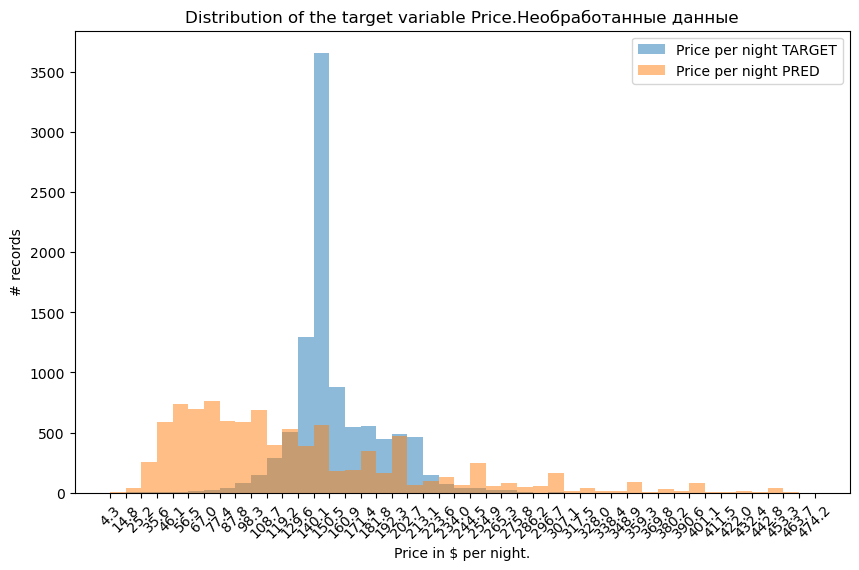

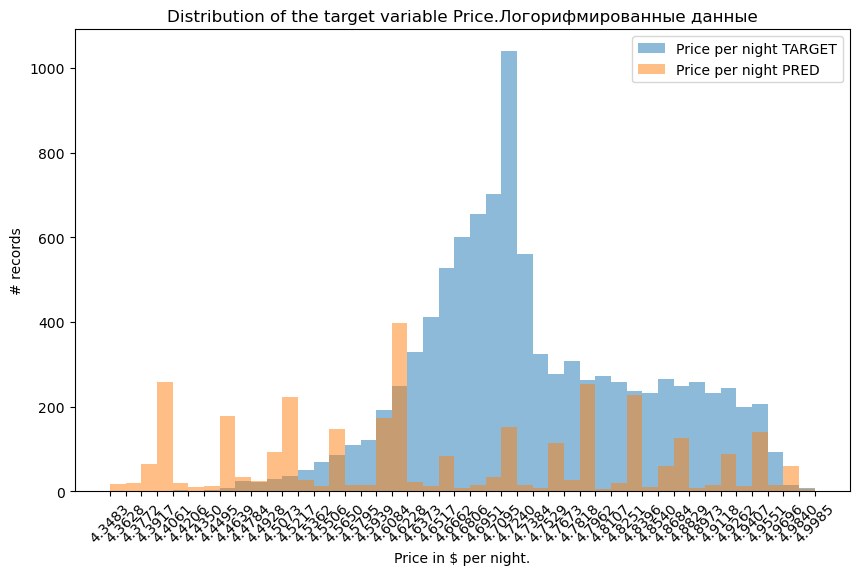

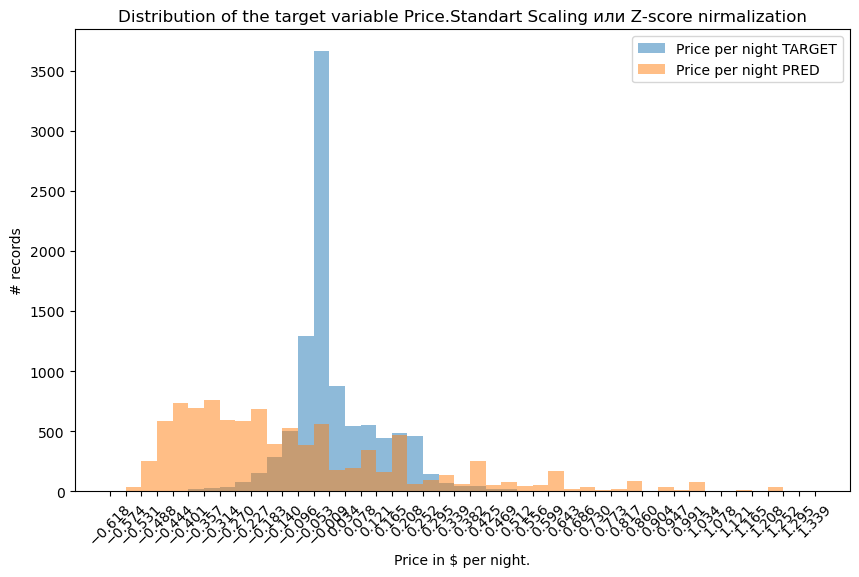

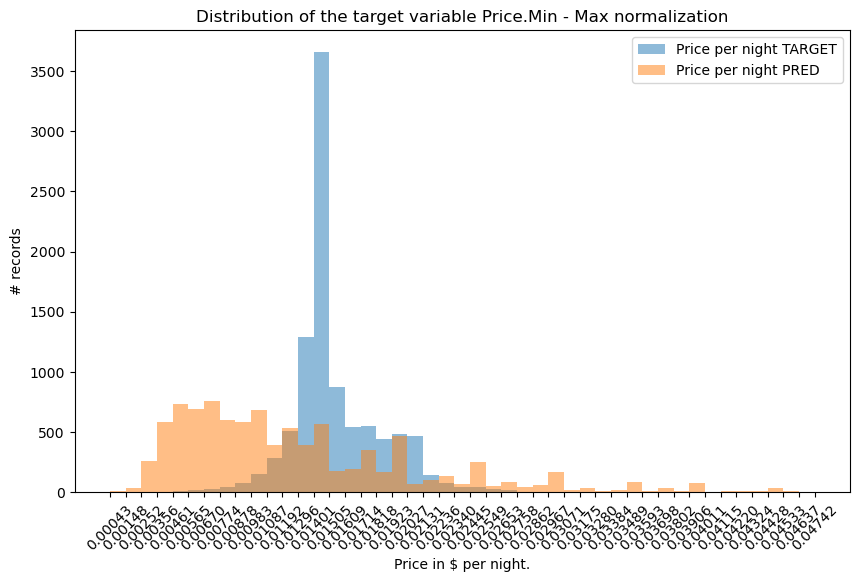

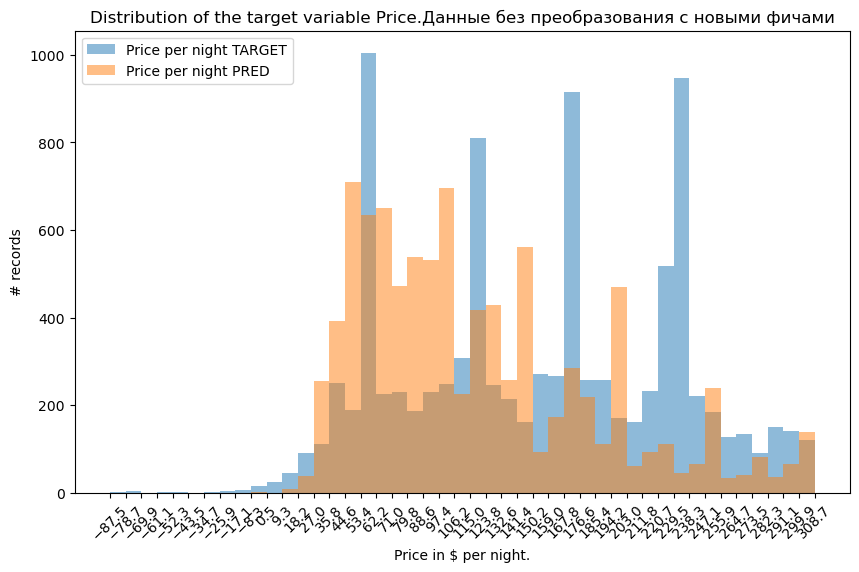

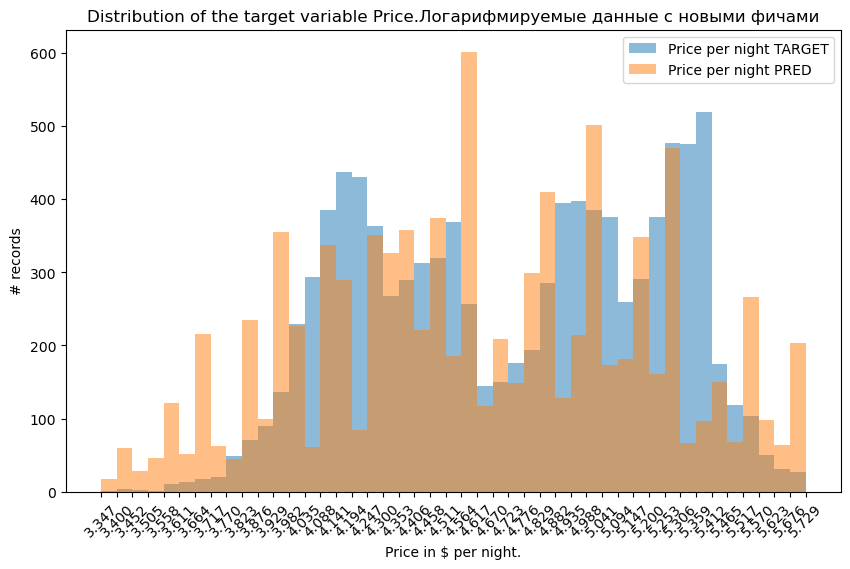

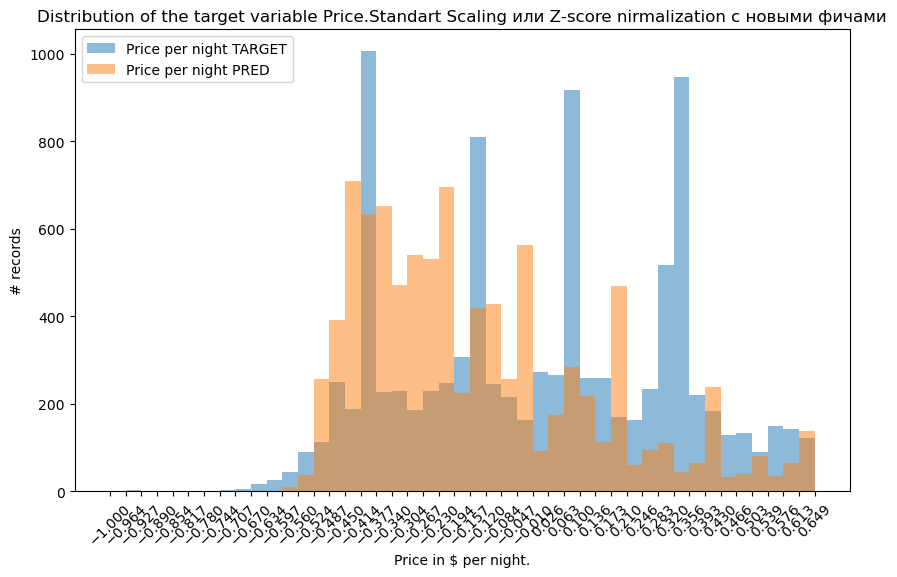

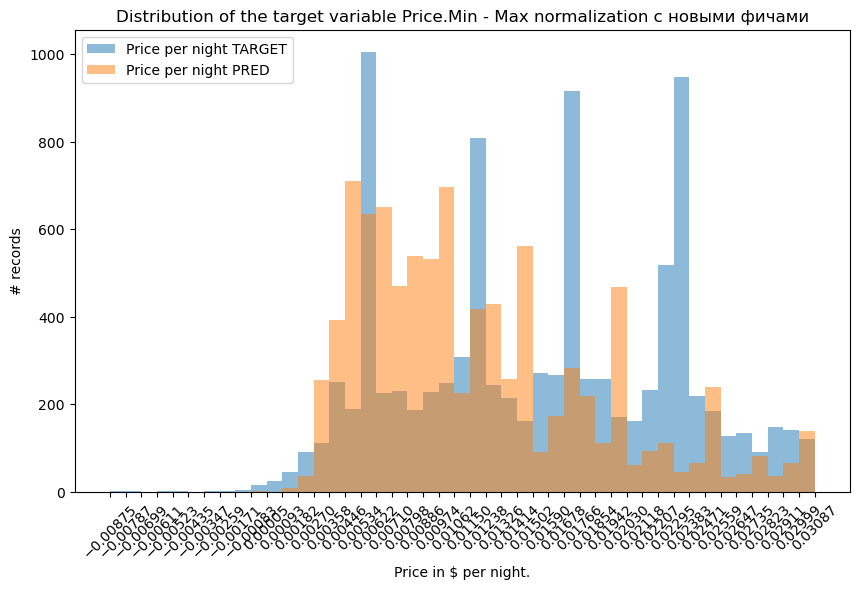

In [67]:
for data in list_of_instance_class:
    data0 = data.predict()
    data1 = data.y_val
    
    
    fig, ax = plt.subplots(figsize = (10,6))
    
    _,bins,_ = ax.hist(data0, label = 'Price per night TARGET', alpha = 0.5, bins = 45)
    ax.hist(data1, label = 'Price per night PRED', alpha = 0.5, bins = bins)
    
    ax.set_title('Distribution of the target variable Price.{name}'.format(name = data.name))
    ax.set_xlabel('Price in $ per night.')
    ax.set_ylabel('# records')
    ax.set_xticks(bins)
    ax.tick_params(axis='x', rotation = 45)
    ax.legend()
    plt.show()

# 12.–ü–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

#### –°–∞–º–æ–µ –≤–∞–∂–Ω–æ–µ

–ú–æ–¥–µ–ª—å –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –±–æ–ª–µ–µ –≥–∏–±–∫–æ–π, –µ—Å–ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –æ—Ç –∏—Å—Ö–æ–¥–Ω—ã—Ö –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤ (–≤—Ö–æ–¥–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö) ‚Äî —Ç–∞–∫–æ–π –ø–æ–¥—Ö–æ–¥ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π.

* –ß–∞—â–µ –≤—Å–µ–≥–æ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –Ω–µ–ª–∏–Ω–µ–π–Ω—ã—Ö —Ñ—É–Ω–∫—Ü–∏–π –∏—Å–ø–æ–ª—å–∑—É—é—Ç —Å—Ç–µ–ø–µ–Ω–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏.
* –° —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º —Å—Ç–µ–ø–µ–Ω–∏ –ø–æ–ª–∏–Ω–æ–º–∞ –º–æ–¥–µ–ª—å –Ω–∞—á–∏–Ω–∞–µ—Ç –æ–ø–∏—Å—ã–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ, –Ω–∞ –∫–æ—Ç–æ—Ä—ã—Ö –æ–±—É—á–∞–µ—Ç—Å—è, –≤—Å—ë –ª—É—á—à–µ –∏ –ª—É—á—à–µ, –¥–∞–∂–µ —Å–ª–∏—à–∫–æ–º —Ö–æ—Ä–æ—à–æ ‚Äî –Ω–∞—á–∏–Ω–∞—è —Å –æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω–æ–π —Å—Ç–µ–ø–µ–Ω–∏ –ø–æ–ª–∏–Ω–æ–º–∞ —ç—Ç–æ —Å–Ω–∏–∂–∞–µ—Ç –æ–±–æ–±—â–∞—é—â—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏, —Ç–æ –µ—Å—Ç—å –Ω–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ –º–æ–¥–µ–ª—å –±—É–¥–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å —Ö—É–∂–µ, —á–µ–º –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É.


–°—Å—ã–ª–∫–∞ –Ω–∞ —Å—Ç–∞—Ç—å—é –Ω–∞ –•–∞–±—Ä–µ.

https://habr.com/ru/articles/571058/

### –ü–†–ò–ú–ï–†:

In [68]:
array = np.array([0,1,2,3,4,5])

In [69]:
array.ndim

1

In [70]:
def generate_degrees(source_data: list, degree: int):
    """–§—É–Ω–∫—Ü–∏—è, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–π –º–∞—Å—Å–∏–≤, –∞ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç n-–º–µ—Ä–Ω—ã–π
    
    –î–ª—è –∫–∞–∂–¥–æ–π —Å—Ç–µ–ø–µ–Ω–∏ –æ—Ç 1 –¥–æ  degree –≤–æ–∑–≤–æ–¥–∏–º x –≤ —ç—Ç—É —Å—Ç–µ–ø–µ–Ω—å
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [71]:
generate_degrees(source_data= array, degree= 2)

array([[ 0,  0],
       [ 1,  1],
       [ 2,  4],
       [ 3,  9],
       [ 4, 16],
       [ 5, 25]])

In [72]:
poly = PolynomialFeatures(degree=2, interaction_only = False, include_bias=False).fit_transform(d_1.get('df_train'))
poly.shape

(29337, 20)

In [73]:
d_1.get('df_train').shape

(29337, 5)

–ü—Ä–∏–∑–Ω–∞–∫–∏ –≤—Ç–æ—Ä–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞ —ç—Ç–æ –≤—Å–µ –∫–º–±–∏–Ω–∞—Ü–∏–∏ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ —Å –∫–∞–∂–¥—ã–º. 

#### –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –¢–û–õ–¨–ö–û –æ–±—É—á–∞—é—â–∏–µ —á–∞—Å—Ç–∏. 

In [74]:
list_of_models_2 =[d_1_1, d_2_1, d_3_1, d_4_1]
for data in list_of_models_2:
    for X in ['df_train','df_val','df_test']:
        data[X] = PolynomialFeatures(degree=2).fit_transform(data.get(X))

In [75]:
list_of_instance_class = []
for data in list_of_models_2:
    instace = LinReg(
        df_train = data.get('df_train'), 
        y_train = data.get('y_train'), 
        df_val = data.get('df_val'), 
        y_val = data.get('y_val'), 
        df_test = data.get('df_test'), 
        y_test = data.get('y_test'), 
        name = data.get('name')
    )
    instace.fit()
    instace.loss()
    list_of_instance_class.append(instace)

–ú–æ–¥–µ–ª—å –î–∞–Ω–Ω—ã–µ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏, –æ–±—É—á–µ–Ω–∞.
–ú–æ–¥–µ–ª—å –î–∞–Ω–Ω—ã–µ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏.

–û—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:
MSE: 69905.8357014029 –õ—É—á—à–µ –ø—Ä–∏–º–µ–Ω—è—Ç—å, –∫–æ–≥–¥–∞ –≤—ã–±–æ—Ä–∫–µ –Ω–µ—Ç ¬´–≤—ã–±—Ä–æ—Å–æ–≤¬ª (–æ—Ç –∞–Ω–≥–ª. outliers)
RMSE: 264.3971174226431 –ß–µ–º –±–ª–∏–∂–µ –∫ –Ω—É–ª—é —Ç–µ–º –ª—É—á—à–µ! –ï—Å–ª–∏ —É–±—Ä–∞—Ç—å –≤—ã–±—Ä–æ—Å—ã - —Ç–æ –º–µ—Ç—Ä–∏–∫–∞ —Å–∏–ª—å–Ω–æ —É–ª—É—á—à–∏—Ç—Å—è.
MAE: 72.16036735708879 –ï—Å–ª–∏ ¬´–≤—ã–±—Ä–æ—Å—ã¬ª –µ—Å—Ç—å, –ª—É—á—à–µ –ø—Ä–∏–º–µ–Ω—è—Ç—å MAE.
r2score: -10.012588555073211 –ù–∞–∏–ª—É—á—à–µ–µ –≤–æ–∑–º–æ–∂–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ 1.0. –ï—Å–ª–∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π - –º–æ–¥–µ–ª—å —Å–æ–≤—Å–µ–º —É–∂ –ø–ª–æ—Ö–∞—è.

–ú–æ–¥–µ–ª—å –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º—ã–µ –¥–∞–Ω–Ω—ã–µ —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏, –æ–±—É—á–µ–Ω–∞.
–ú–æ–¥–µ–ª—å –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º—ã–µ –¥–∞–Ω–Ω—ã–

#### –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–æ–≤—ã—Ö —Ñ–∏—á–µ–π –∏ –æ–±—É—á–µ–Ω–∏–µ —Å –ø–æ–ª–∏–Ω–æ–º–∞–º–∏ –Ω–∞–º –Ω–µ —Å–∏–ª—å–Ω–æ –ø–æ–º–æ–≥–ª–æ, –∞ –≤ –∫–∞–∫–∏—Ö-—Ç–æ –º–æ–º–µ–Ω—Ç–∞—Ö –∏ —É—Ö—É–¥—à–∏–ª–æ –Ω–∞—à–∏ –º–µ—Ç—Ä–∏–∫–∏. P.S. –æ–±—É—á–µ–Ω–∏–µ 6 —Å—Ç–µ–ø–µ–Ω–∏ –ø–æ–ª–∏–Ω–æ–º–æ–º –∑–∞–Ω—è–ª–æ –ø—Ä–∏–º–µ—Ä–Ω–æ 3 —á–∞—Å–∞.

In [76]:
df_for_sr = pd.DataFrame([['–î–∞–Ω–Ω—ã–µ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è', 75206.87, 274.23, 91.00, -84.25],
             ['–õ–æ–≥–æ—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ', 0.46, 0.68, 0.53, -41.71],
             ['Standart Scaling', 1.30, 1.14, 0.37, -84.25],
             ['Min - Max normalization', 0.00075, 0.027, 0.0091, -84.25],
             ['–î–∞–Ω–Ω—ã–µ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è + 1', 70716.79, 265.92, 74.34, -11.62],
             ['–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º—ã–µ –¥–∞–Ω–Ω—ã–µ + 1', 0.24, 0.49, 0.35, -0.0129],
             ['Standart Scaling + 1', 1.226, 1.107, 0.309, -11.62],
             ['Min - Max normalization + 1', 0.000707, 0.02659, 0.007434, -11.6239],
             ['–î–∞–Ω–Ω—ã–µ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è + 1 + POL', 6193255536811.89, 3232145.14, 27917.98, -0.00011],
             ['–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º—ã–µ –¥–∞–Ω–Ω—ã–µ + 1 + POL', 10446762250864.67, 2488625.23, 107884.33, -9.4288],                         
             ['Standart Scaling + 1 + POL', 915618155.92, 30259.18, 342.58, -9.3601],
             ['Min - Max normalization + 1 + POL', 467775077747.24, 683940.84, 7289.05, -0.00010659]])

In [77]:
df_for_sr.columns = ['Name of data', 'MSE', 'RMSE', 'MAE', 'r2score']
pd.options.display.float_format ='{:,.6f}'.format
df_for_sr

Name of data                       MSE  \
0             –î–∞–Ω–Ω—ã–µ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è             75,206.870000   
1              –õ–æ–≥–æ—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ                  0.460000   
2                      Standart Scaling                  1.300000   
3               Min - Max normalization                  0.000750   
4         –î–∞–Ω–Ω—ã–µ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è + 1             70,716.790000   
5            –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º—ã–µ –¥–∞–Ω–Ω—ã–µ + 1                  0.240000   
6                  Standart Scaling + 1                  1.226000   
7           Min - Max normalization + 1                  0.000707   
8   –î–∞–Ω–Ω—ã–µ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è + 1 + POL  6,193,255,536,811.889648   
9      –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º—ã–µ –¥–∞–Ω–Ω—ã–µ + 1 + POL 10,446,762,250,864.669922   
10           Standart Scaling + 1 + POL        915,618,155.920000   
11    Min - Max normalization + 1 + POL    467,775,077,747.239990   

               RMSE            MAE    r2score  
0        274.230000      91.000000 -84.250000  
1          0.680000       0.530000 -41.710000  
2          1.140000       0.370000 -84.250000  
3          0.027000       0.009100 -84.250000  
4        265.920000      74.340000 -11.620000  
5          0.490000       0.350000  -0.012900  
6          1.107000       0.309000 -11.620000  
7          0.026590       0.007434 -11.623900  
8  3,232,145.140000  27,917.980000  -0.000110  
9  2,488,625.230000 107,884.330000  -9.428800  
10    30,259.180000     342.580000  -9.360100  
11   683,940.840000   7,289.050000  -0.000107

# 13.–†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è

–ò–Ω–æ–≥–¥–∞ –ø—Ä–∏ –¥–æ–±–∞–≤–ª–µ–Ω–∏–∏ –Ω–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ –≤ –• –º—ã –º–æ–∂–µ–º —Å–ª—É—á–∞–π–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å —Å—Ç–æ–ª–±–µ—Ü, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—â–∏–π —Å–æ–±–æ–π –∫–æ–º–±–∏–Ω–∞—Ü–∏—é –¥—Ä—É–≥–∏—Ö —Å—Ç–æ–ª–±—Ü–æ–≤. –ö–æ–≥–¥–∞ –ø–æ–¥–æ–±–Ω–æ–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç - —Ç–æ –ø—Ä–æ–∏–∑–≤–¥–µ–Ω–∏–µ —Ç—Ä–∞–Ω—Å–ø–æ–Ω–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã –Ω–∞ —Å–µ–±—è —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –Ω–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–π –∏–ª–∏ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–π. –í NumPy —Å–æ–æ–±—â–∏—Ç –Ω–∞–º –æ–± —ç—Ç–æ–º.

–ü–æ—ç—Ç–æ–π –ø—Ä–∏—á–∏–Ω–µ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –≤–µ—Å–∞—Ö —Å—Ç–∞–Ω–æ–≤—è—Ç—Å—è —á–µ—Ä–µ–∑–≤—ã—á–∞–π–Ω–æ –±–æ–ª—å—à–∏–º–∏ - –Ω–∞–º–Ω–æ–≥–æ –±–æ–ª—å—à–µ, —á–µ–º –¥–æ–ª–∂–Ω—ã. 

In [78]:
list_of_instance_class[-1].model.coef_.max()

1310475337.684494

–í —á–∏—Å–ª–µ–Ω–Ω–æ–π –ª–∏–Ω–µ–π–Ω–æ–π –∞–ª–≥–µ–±—Ä–µ —Ç–∞–∫–∏–µ –ø—Ä–æ–±–ª–µ–º—ã –Ω–∞–∑—ã–≤–∞—é—Ç—Å—è –ø—Ä–æ–±–ª–µ–º–∞–º–∏ –Ω–µ—É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏ —á–∏—Å–ª–µ–Ω–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è –∏ –æ–±—ã—á–Ω–æ —Ä–µ—à–∞—é—Ç—Å—è —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–æ–≤ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏. 

–ù–æ–≤—ã–µ –ø–æ–Ω—è—Ç–∏—è:
* –ü–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ (–ø–µ—Ä–µ–ø–æ–¥–≥–æ–Ω–∫–∞, –ø–µ—Ä–µ- –≤ –∑–Ω–∞—á–µ–Ω–∏–∏ ¬´—Å–ª–∏—à–∫–æ–º¬ª (–∞–Ω–≥–ª. overfitting)) ‚Äî —è–≤–ª–µ–Ω–∏–µ, –∫–æ–≥–¥–∞ –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å —Ö–æ—Ä–æ—à–æ –æ–±—ä—è—Å–Ω—è–µ—Ç –ø—Ä–∏–º–µ—Ä—ã –∏–∑ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏, –Ω–æ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –ø–ª–æ—Ö–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–∞ –ø—Ä–∏–º–µ—Ä–∞—Ö, –Ω–µ —É—á–∞—Å—Ç–≤–æ–≤–∞–≤—à–∏—Ö –≤ –æ–±—É—á–µ–Ω–∏–∏ (–Ω–∞ –ø—Ä–∏–º–µ—Ä–∞—Ö –∏–∑ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏). –ü–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ –∏–º–µ–µ—Ç –º–µ—Å—Ç–æ –ø—Ä–∏ –≤—ã–±–æ—Ä–µ —Å–ª–∏—à–∫–æ–º —Å–ª–æ–∂–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π.
* –ù–µ–¥–æ–æ–±—É—á–µ–Ω–∏–µ ‚Äî —ç—Ç–æ —è–≤–ª–µ–Ω–∏–µ, –æ–±—Ä–∞—Ç–Ω–æ–µ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—é, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º –∞–ª–≥–æ—Ä–∏—Ç–º –Ω–µ –ø–æ–ª–Ω–æ—Å—Ç—å—é –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–µ –µ–º—É –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –¥–∞–Ω–Ω—ã–µ.
* –†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è ‚Äî –º–µ—Ç–æ–¥ –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–π –∫ —É—Å–ª–æ–≤–∏—é —Å —Ü–µ–ª—å—é –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è. –û–Ω–∞ —á–∞—Å—Ç–æ –∏–º–µ–µ—Ç –≤–∏–¥ —à—Ç—Ä–∞—Ñ–∞ –∑–∞ —Å–ª–æ–∂–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.

–°–∞–º–æ–µ –≤–∞–∂–Ω–æ–µ
* –î–ª—è –≤—ã–±–æ—Ä–∞ –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏, —á—Ç–æ–±—ã –æ–Ω–∞ –Ω–µ ¬´–æ–≤–µ—Ä—Ñ–∏—Ç–Ω—É–ª–∞—Å—å¬ª, –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º, –∫–æ—Ç–æ—Ä—ã–π –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è ¬´–∫–æ–Ω—Ç—Ä–æ–ª—å –Ω–∞ –æ—Ç–ª–æ–∂–µ–Ω–Ω–æ–π (–≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π) –≤—ã–±–æ—Ä–∫–µ¬ª:
* –†–∞–∑–±–∏–≤–∞–µ–º –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É –Ω–∞ –¥–≤–µ —á–∞—Å—Ç–∏: –≤ –æ–¥–Ω–æ–π —á–∞—Å—Ç–∏ —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è 80% –æ–±—É—á–∞—é—â–∏—Ö –ø—Ä–∏–º–µ—Ä–æ–≤ (—ç—Ç–∞ —á–∞—Å—Ç—å –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è train set), –≤ –¥—Ä—É–≥–æ–π ‚Äî 20% (—ç—Ç–∞ —á–∞—Å—Ç—å –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è validation set).
* –í—ã–±–∏—Ä–∞–µ–º –º–µ—Ç—Ä–∏–∫—É –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ (–¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, MSE).
* –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö.
* –î–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö –∏ –≤—ã—á–∏—Å–ª—è–µ–º –º–µ—Ç—Ä–∏–∫—É –∫–∞—á–µ—Å—Ç–≤–∞.
* –ï—Å–ª–∏ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —Ö—É–∂–µ, —á–µ–º –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ, –º–æ–¥–µ–ª—å –ø–µ—Ä–µ–æ–±—É—á–∏–ª–∞—Å—å. –¢–∞–∫—É—é –º–æ–¥–µ–ª—å –Ω–µ–ª—å–∑—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å, –∏ —Å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ–º –Ω–∞–¥–æ –±–æ—Ä–æ—Ç—å—Å—è.

    –û–¥–∏–Ω –∏–∑ —Å–ø–æ—Å–æ–±–æ–≤ –±–æ—Ä—å–±—ã —Å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ–º ‚Äî —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è.
–í —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–π –±–∏–±–ª–∏–æ—Ç–µ–∫–µ sklearn –µ—Å—Ç—å –¥–≤–∞ –∫–ª–∞—Å—Å–∞, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è:
* Ridge ‚Äî –∫–ª–∞—Å—Å –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ sklearn, —Ä–µ–∞–ª–∏–∑—É—é—â–∏–π –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é —Å **L1-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π**.* 
Lasso ‚Äî –∫–ª–∞—Å—Å –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ sklearn, —Ä–µ–∞–ª–∏–∑—É—é—â–∏–π –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é —Å **L2-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π**..

* sklearn.linear_model.Ridge https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html;
* sklearn.linear_model.Lasso https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html.

**–í–ê–ñ–ù–û**

–í—ã–±–æ—Ä –º–µ–∂–¥—É –¥–≤—É–º—è —Ç–∏–ø–∞–º–∏ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏:


* –µ—Å–ª–∏ —Ñ–∏—á–µ–π –æ—á–µ–Ω—å –º–Ω–æ–≥–æ (—Å–æ—Ç–Ω–∏) –∏ —Å—Ä–µ–¥–∏ –Ω–∏—Ö –µ—Å—Ç—å –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –Ω–µ–≤–∞–∂–Ω—ã–µ, –≤—ã–±–∏—Ä–∞–π L1;
* –µ—Å–ª–∏ —Ñ–∏—á–µ–π –º–∞–ª–æ –∏ –≤—Å–µ –æ–Ω–∏ –≤–∞–∂–Ω—ã, –≤—ã–±–∏—Ä–∞–π L2.
–í—ã–±–æ—Ä –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ –º–æ–∂–Ω–æ –æ—Å—É—â–µ—Å—Ç–≤–∏—Ç—å —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∫–æ–Ω—Ç—Ä–æ–ª—è –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.

In [79]:
list_of_instance_class[-3].name

'–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º—ã–µ –¥–∞–Ω–Ω—ã–µ —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏'

In [80]:
alphas = [0.1, 0.15, 0.35, 0.5, 0.8]

df_Ridge_res = pd.DataFrame(columns= ['Name of data', 'MSE', 'RMSE', 'MAE', 'r2score', 'alphas'])

for best_alpha in alphas:
    for data in list_of_instance_class:
        
        model_Ridge = Ridge(alpha=best_alpha)
        model_Ridge.fit(data.df_train, data.y_train)

        
        MSE = mean_squared_error(model_Ridge.predict(data.df_val), data.y_val, squared=True)
        RMSE = mean_squared_error(model_Ridge.predict(data.df_val), data.y_val, squared=False)
        MAE = mean_absolute_error(model_Ridge.predict(data.df_val), data.y_val,)
        r2score = r2_score(model_Ridge.predict(data.df_val), data.y_val,)


        newDict = {"Name of data": data.name,
                   "MSE": MSE,
                   "RMSE": RMSE,
                   "MAE": MAE,
                   "r2score": r2score,
                   "alphas" :best_alpha
                   }

        dfappend = pd.DataFrame([newDict])

        #df_Ridge_res = pd.concat([df_Ridge_res, dfappend])
        df_Ridge_res = (df_Ridge_res.copy() if dfappend.empty else dfappend.copy() if df_Ridge_res.empty
       else pd.concat([df_Ridge_res, dfappend]) # if both DataFrames non empty
      )
 

In [81]:
df_Ridge_res = pd.concat([df_for_sr.iloc[8:12],df_Ridge_res])
df_Ridge_res

Name of data  \
8                 –î–∞–Ω–Ω—ã–µ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è + 1 + POL   
9                    –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º—ã–µ –¥–∞–Ω–Ω—ã–µ + 1 + POL   
10                         Standart Scaling + 1 + POL   
11                  Min - Max normalization + 1 + POL   
0           –î–∞–Ω–Ω—ã–µ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏   
0              –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º—ã–µ –¥–∞–Ω–Ω—ã–µ —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏   
0   Standart Scaling –∏–ª–∏ Z-score nirmalization —Å –Ω...   
0             Min - Max normalization —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏   
0           –î–∞–Ω–Ω—ã–µ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏   
0              –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º—ã–µ –¥–∞–Ω–Ω—ã–µ —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏   
0   Standart Scaling –∏–ª–∏ Z-score nirmalization —Å –Ω...   
0             Min - Max normalization —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏   
0           –î–∞–Ω–Ω—ã–µ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏   
0              –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º—ã–µ –¥–∞–Ω–Ω—ã–µ —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏   
0   Standart Scaling –∏–ª–∏ Z-score nirmalization —Å –Ω...   
0             Min - Max normalization —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏   
0           –î–∞–Ω–Ω—ã–µ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏   
0              –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º—ã–µ –¥–∞–Ω–Ω—ã–µ —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏   
0   Standart Scaling –∏–ª–∏ Z-score nirmalization —Å –Ω...   
0             Min - Max normalization —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏   
0           –î–∞–Ω–Ω—ã–µ –±–µ–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏   
0              –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º—ã–µ –¥–∞–Ω–Ω—ã–µ —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏   
0   Standart Scaling –∏–ª–∏ Z-score nirmalization —Å –Ω...   
0             Min - Max normalization —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏   

                         MSE             RMSE            MAE    r2score  \
8   6,193,255,536,811.889648 3,232,145.140000  27,917.980000  -0.000110   
9  10,446,762,250,864.669922 2,488,625.230000 107,884.330000  -9.428800   
10        915,618,155.920000    30,259.180000     342.580000  -9.360100   
11    467,775,077,747.239990   683,940.840000   7,289.050000  -0.000107   
0              69,905.631560       264.396731      72.159433 -10.013231   
0                   0.233062         0.482765       0.348876   0.072104   
0                   1.212022         1.100919       0.300396 -10.023598   
0                   0.000699         0.026441       0.007198 -10.102882   
0              69,905.538920       264.396556      72.159271 -10.013524   
0                   0.233064         0.482767       0.348879   0.072081   
0                   1.212010         1.100913       0.300392 -10.025315   
0                   0.000699         0.026443       0.007197 -10.120073   
0              69,905.215461       264.395944      72.158639 -10.014549   
0                   0.233069         0.482772       0.348887   0.072000   
0                   1.211993         1.100905       0.300400 -10.028270   
0                   0.000700         0.026449       0.007193 -10.172157   
0              69,905.009534       264.395555      72.158246 -10.015203   
0                   0.233073         0.482776       0.348892   0.071948   
0                   1.211987         1.100903       0.300404 -10.029389   
0                   0.000700         0.026453       0.007190 -10.202188   
0              69,904.658992       264.394892      72.157715 -10.016312   
0                   0.233078         0.482782       0.348901   0.071863   
0                   1.211978         1.100899       0.300404 -10.031008   
0                   0.000700         0.026457       0.007185 -10.250364   

     alphas  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
0  0.100000  
0  0.100000  
0  0.100000  
0  0.100000  
0  0.150000  
0  0.150000  
0  0.150000  
0  0.150000  
0  0.350000  
0  0.350000  
0  0.350000  
0  0.350000  
0  0.500000  
0  

In [82]:
model_Ridge = Ridge(alpha=0.8)
model_Ridge.fit(list_of_instance_class[-3].df_train, list_of_instance_class[-3].y_train)
MAE_train = mean_absolute_error(model_Ridge.predict(list_of_instance_class[-3].df_train), list_of_instance_class[-3].y_train)
MAE_val = mean_absolute_error(model_Ridge.predict(list_of_instance_class[-3].df_val), list_of_instance_class[-3].y_val)
MAE_test = mean_absolute_error(model_Ridge.predict(list_of_instance_class[-3].df_test), list_of_instance_class[-3].y_test)
newDict = {"Name of data": list_of_instance_class[-3].name,
                   "MAE_train": MAE_train,
                   "MAE_val": MAE_val,
                   "MAE_test": MAE_test
                   }
dfappend = pd.DataFrame([newDict])
dfappend

Name of data  MAE_train  MAE_val  MAE_test
0  –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º—ã–µ –¥–∞–Ω–Ω—ã–µ —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏   0.354412 0.348901  0.355343

In [83]:
data_for_pred = list_of_instance_class[-3].df_test[0]
y_for_pred = list_of_instance_class[-3].y_test[21494]
price = model_Ridge.predict(data_for_pred.reshape(1, -1))
price = np.expm1(price)
print ('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è —Ü–µ–Ω–∞: {price} \n–¶–µ–Ω–∞ –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞: {df_p}'.format(price=price[0], df_p=df.iloc[21494, 9]))

–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è —Ü–µ–Ω–∞: 53.84012455816829 
–¶–µ–Ω–∞ –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞: 64


# 14. –ü–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ –º–æ–¥–µ–ª–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

**–°–º–æ—Ç—Ä–∏ –ø—É–Ω–∫—Ç 13**

# 15. –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

HalvingSearch: —É—Å–∫–æ—Ä–µ–Ω–∏–µ –ø–æ–∏—Å–∫–∞ –ø–æ —Å–µ—Ç–∫–µ (grid search).

https://scikit-learn.org/stable/modules/grid_search.html#successive-halving-user-guide

–ú–µ—Ç–æ–¥ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. –ü—Ä–∏–Ω—Ü–∏–ø —Ä–∞–±–æ—Ç—ã –æ–±–æ–∏—Ö –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ –æ–¥–∏–Ω–∞–∫–æ–≤.

Halving –∑–¥–µ—Å—å –æ–∑–Ω–∞—á–∞–µ—Ç ¬´—É–ø–æ–ª–æ–≤–∏–Ω–∏–≤–∞–Ω–∏–µ¬ª, —Ç.–µ. –¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –¥–≤–µ —á–∞—Å—Ç–∏, —Ö–æ—Ç—è –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –ø—Ä–æ–∏–∑–≤–æ–ª—å–Ω–æ–µ —á–∏—Å–ª–æ —á–∞—Å—Ç–µ–π (—á–∞—â–µ –≤—Å–µ–≥–æ –Ω–∞ —Ç—Ä–∏).

–ù–∏–∂–µ –º–æ–¥–µ–ª–∏ —Å —Ä–∞–∑–Ω—ã–º–∏ –Ω–∞–±–æ—Ä–∞–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –±—É–¥–µ–º –Ω–∞–∑—ã–≤–∞—Ç—å ¬´–∫–∞–Ω–¥–∏–¥–∞—Ç–∞–º–∏¬ª.

–ò–¥–µ—è –≤ —Ç–æ–º, —á—Ç–æ –ø—Ä–æ–≤–µ—Ä–∫—É –º–æ–∂–Ω–æ —É—Å–∫–æ—Ä–∏—Ç—å, —É–º–µ–Ω—å—à–∏–≤ —á–∏—Å–ª–æ –æ–±—ä–µ–∫—Ç–æ–≤ –≤ —É—á–µ–±–Ω–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö. –û–¥–Ω–∞–∫–æ –ø—Ä–∏ —ç—Ç–æ–º —Å–Ω–∏–∂–∞–µ—Ç—Å—è —Ç–æ—á–Ω–æ—Å—Ç—å –ø—Ä–æ–≥–Ω–æ–∑–∞, –ø–æ—ç—Ç–æ–º—É –¥–ª—è –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ–≥–æ –æ—Ç–±–æ—Ä–∞ –∫–∞–Ω–¥–∏–¥–∞—Ç–æ–≤ –ª—É—á—à–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤—Å–µ –∏–º–µ—é—â–∏–µ—Å—è –¥–∞–Ω–Ω—ã–µ

# –ò–¢–û–ì–ò:

* –í–∞–∂–Ω–æ –ø—Ä–æ–≤–æ–¥–∏—Ç—å –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω—ã–π –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑. –í–∞–∂–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.
* –ü—Ä–æ–≤–µ—Ä—è—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –ï—Å–ª–∏ —Ü–µ–ª–µ–≤–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–º–µ–µ—Ç –¥–ª–∏–Ω–Ω—ã–π —Ö–≤–æ—Å—Ç, —Ç–æ —Å–ª–µ–¥—É–µ—Ç –ø—Ä–∏–º–µ–Ω–∏—Ç—å –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è.
* –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â–∏–µ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω—ã–µ –∏ —Ç–µ—Å—Ç–æ–≤—ã–µ - –ª—É—á—à–∏–π —Å–ø–æ—Å–æ–± –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–∞—à–∏ –º–æ–¥–µ–ª–∏.
* –û—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –ø–æ–∑–≤–æ–ª—è—é—Ç —Å—Ä–∞–≤–Ω–∏—Ç—å –º–æ–¥–µ–ª–∏ –º–µ–∂–¥—É —Å–æ–±–æ–π.
* –ö–æ–Ω—Å—Ç—Ä—É–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ - –ø—Ä–æ—Ü–µ—Å—Å —Å–æ–∑–¥–∞–Ω–∏—è –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
* –ü—Ä–æ–±–ª–µ–º—ã –Ω–µ—É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏ —á–∏—Å–ª–µ–Ω–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è –ø–æ–º–æ–≥–∞–µ—Ç —Ä–µ—à–∏—Ç—å —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è.

# –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫. SGDRegressor.

–£ –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ —Ä–∞—Å—á—ë—Ç–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –µ—Å—Ç—å —Ä—è–¥ –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–æ–≤, –≤ —Ç–æ–º —á–∏—Å–ª–µ:

1. –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–∞—è —Å–ª–æ–∂–Ω–æ—Å—Ç—å –∏–∑-–∑–∞ –º–∞—Ç—Ä–∏—á–Ω–æ–≥–æ –ø–µ—Ä–µ–º–Ω–æ–∂–µ–Ω–∏—è. –ü—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –º–∞—Ç—Ä–∏—Ü—ã –≤ 10 —Ä–∞–∑ —Å–ª–æ–∂–Ω–æ—Å—Ç—å –≤—ã—á–∏—Å–ª–µ–Ω–∏–π —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –≤ 1000 —Ä–∞–∑;
2. –Ω–µ—É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –≤—ã—á–∏—Å–ª–µ–Ω–∏–π: –ø—Ä–∏ –ø–æ–ø—ã—Ç–∫–µ –Ω–∞–π—Ç–∏ –æ–±—Ä–∞—Ç–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É, –∫–æ—Ç–æ—Ä–∞—è –º–æ–∂–µ—Ç –Ω–µ —Å—É—â–µ—Å—Ç–≤–æ–≤–∞—Ç—å, –≤ –∞–ª–≥–æ—Ä–∏—Ç–º–µ –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è –æ–±—Ä–∞—Ç–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã –≤–æ–∑–Ω–∏–∫–∞–µ—Ç –¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –Ω–æ–ª—å.

–ò–∑–±–µ–∂–∞—Ç—å —ç—Ç–∏—Ö –ø—Ä–æ–±–ª–µ–º –º–æ–∂–Ω–æ —Å –ø–æ–º–æ—â—å—é –ø—Ä–∏–±–ª–∏–∂—ë–Ω–Ω—ã—Ö —á–∏—Å–ª–µ–Ω–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤. –ü—Ä–∏ —ç—Ç–æ–º –Ω–µ –Ω–∞–¥–æ –±—É–¥–µ—Ç –ø–µ—Ä–µ–º–Ω–æ–∂–∞—Ç—å –º–∞—Ç—Ä–∏—Ü—ã –∏–ª–∏ –Ω–∞—Ö–æ–¥–∏—Ç—å –æ–±—Ä–∞—Ç–Ω—ã–µ –º–∞—Ç—Ä–∏—Ü—ã. –°–∞–º—ã–π –ø—Ä–æ—Å—Ç–æ–π –∏ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–π –∏–∑ —ç—Ç–∏—Ö –º–µ—Ç–æ–¥–æ–≤ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è –º–µ—Ç–æ–¥–æ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞. –°—É—Ç—å –º–µ—Ç–æ–¥–∞ —Å–æ—Å—Ç–æ–∏—Ç –≤ –æ–±–Ω–æ–≤–ª–µ–Ω–∏–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏ ùë§ –ø–æ –º–∞–ª–µ–Ω—å–∫–∏–º —à–∞–∂–∫–∞–º –≤–º–µ—Å—Ç–æ —Ç–æ–≥–æ, —á—Ç–æ–±—ã –Ω–∞—Ö–æ–¥–∏—Ç—å –∏—Ö —Å—Ä–∞–∑—É. –ö–∞–∂–¥—ã–π —Ç–∞–∫–æ–π —à–∞–∂–æ–∫ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è –∏—Ç–µ—Ä–∞—Ü–∏–µ–π.

**–ö–æ–≥–¥–∞ —Å–ª–µ–¥—É–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫** 
* –ö–æ–≥–¥–∞ –¥–∞–Ω–Ω—ã—Ö –æ—á–µ–Ω—å –º–Ω–æ–≥–æ - –Ω–µ—Ö–≤–∞—Ç–∏—Ç –ø–∞–º—è—Ç–∏ —É –∫–æ–º–ø—å—é—Ç–µ—Ä–∞;
* –ö–æ–≥–¥–∞ –Ω—É–∂–Ω–æ –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä–æ–≤–∞—Ç—å —Ç–æ—á–Ω–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è;
  
**–ö–æ–≥–¥–∞ –Ω–µ —Å—Ç–æ–∏—Ç –ø—Ä–∏–º–µ–Ω—è—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É–∫—Å**
* –ö–æ–≥–¥–∞ –¥–∞–Ω–Ω—ã—Ö –º–∞–ª–æ. –í —ç—Ç–æ–º —Å–ª—É—á–∞–µ –ª—É—á—à–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å Ridge –∏–ª–∏ Lasso.

sklearn.linear_model.SGDRegressor ‚Äî –∫–ª–∞—Å—Å –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ sklearn, –≤ –∫–æ—Ç–æ—Ä–æ–º —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫. –ö–ª–∞—Å—Å –ø—Ä–∏–Ω–∏–º–∞–µ—Ç —Å–ª–µ–¥—É—é—â–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:

1. learning_rate='constant' ‚Äî –∏—Å–ø–æ–ª—å–∑—É–µ–º —Å–∞–º—É—é –ø—Ä–æ—Å—Ç—É—é –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏—é —Å–ø—É—Å–∫–∞ –∏–∑ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –≤–æ–∑–º–æ–∂–Ω—ã—Ö (—Å–º. –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏—é);
2. eta0 ‚Äî —à–∞–≥ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞;
3. fit_intercept ‚Äî –¥–∞—ë—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –æ–±—É—á–∏—Ç—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ø—Ä–∏ —Å–≤–æ–±–æ–¥–Ω–æ–º —á–ª–µ–Ω–µ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏;
4. random_state ‚Äî —ç—Ç–æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä –Ω—É–∂–µ–Ω –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ –≤—ã—á–∏—Å–ª–µ–Ω–∏–π
5. alpha - –ö–æ–Ω—Å—Ç–∞–Ω—Ç–∞, —É–º–Ω–æ–∂–∞—é—â–∞—è —á–ª–µ–Ω —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏. –ß–µ–º –≤—ã—à–µ –∑–Ω–∞—á–µ–Ω–∏–µ, —Ç–µ–º —Å–∏–ª—å–Ω–µ–µ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è. .

–ú–µ—Ç–æ–¥ partial_fit() –¥–µ–ª–∞–µ—Ç –æ–¥–Ω—É –∏—Ç–µ—Ä–∞—Ü–∏—é –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞.

In [84]:
from sklearn.linear_model import SGDRegressor
from scipy.spatial import distance

#### –ü—Ä–æ–±—É–µ–º –±–æ–ª—å—à–∏–µ –¥–∞–Ω–Ω—ã–µ —Å Ridge

In [91]:
# –î–µ–ª–∞–µ–º –æ—á–µ–Ω—å –±–æ–ª—å—à–∏–µ –¥–∞–Ω–Ω—ã–µ
for X in ['df_train','df_val','df_test']:
        d_2_1[X] = PolynomialFeatures(degree=2).fit_transform(d_2_1.get(X))

MemoryError: Unable to allocate 1.95 TiB for an array with shape (29337, 9157060) and data type float64

In [89]:
d_2_1['df_val'].shape

(9779, 4278)

In [98]:
model_Ridge = Ridge(alpha=0.8)
model_Ridge.fit(d_2_1['df_train'], d_2_1['y_train'])
MAE_train = mean_absolute_error(model_Ridge.predict(d_2_1['df_train']), d_2_1['y_train'])
MAE_val = mean_absolute_error(model_Ridge.predict(d_2_1['df_val']), d_2_1['y_val'])
MAE_test = mean_absolute_error(model_Ridge.predict(d_2_1['df_test']), d_2_1['y_test'])
newDict = {"Name of data": d_2_1['name'],
                   "MAE_train": MAE_train,
                   "MAE_val": MAE_val,
                   "MAE_test": MAE_test
                   }
dfappend = pd.DataFrame([newDict])
dfappend

Name of data  MAE_train  MAE_val  MAE_test
0  –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º—ã–µ –¥–∞–Ω–Ω—ã–µ —Å –Ω–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏   0.344344 0.347221  0.354352

#### –°–∏–Ω–≥—É–ª—è—Ä–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞

In [101]:
matrix = ([[2, 1],
           [4, 2]])

np.linalg.inv(matrix)

LinAlgError: Singular matrix

#### –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫.

[7.37738147e-01 9.44725134e-02 2.76462842e-01 7.37979504e-01
 4.05474216e-01 1.08979073e-01 2.09369879e-01 1.82622807e-01
 1.34624580e-01 5.20086852e-01 9.94139065e-01 1.29772961e-01
 3.14000926e-01 3.82641209e-01 2.81186662e-02 6.49394721e-01
 7.48585513e-01 2.16380270e-01 5.90686094e-01 4.22714754e-01
 3.56552979e-01 2.26516867e-01 8.66898621e-01 8.85858277e-01
 1.80858813e-01 6.95730212e-01 6.02726262e-02 8.51360479e-01
 1.00979193e-01 1.10343997e-01 5.16255342e-01 1.78003314e-01
 3.30918600e-01 3.91059878e-01 3.75755589e-05 8.07063994e-01
 8.58293400e-02 4.99028728e-01 5.07733584e-01 4.74652428e-01
 6.67684964e-01 4.89442289e-01 6.48227376e-01 1.22383729e-01
 8.69446889e-01 4.80142007e-01 9.35827410e-01 3.99901160e-01
 5.90419285e-01 1.92145188e-01 9.44091532e-01 1.35821060e-01
 4.18718761e-01 3.80979704e-02 7.68205740e-01 1.31066250e-01
 2.11163185e-01 3.62464313e-01 6.32099496e-01 6.46197799e-01
 6.59531924e-01 6.79236049e-01 8.76457682e-01 2.03976915e-01
 3.45422004e-01 4.872503

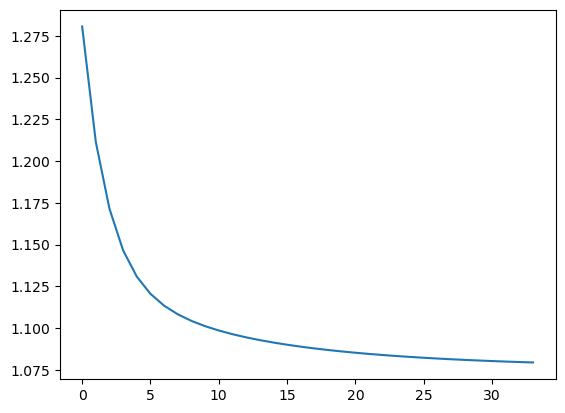

In [102]:
sgd_regressor = SGDRegressor(learning_rate= 'constant', eta0= 0.001, alpha = 0.01, fit_intercept= True, random_state= 42)

# –°–¥–µ–ª–∞–µ–º 1000 —à–∞–≥–æ–≤ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
weight_evo = [] #–î–ª—è –∑–∞–ø–∏—Å–∏ –∏–∑–º–µ—Ä–µ–Ω–∏—è –≤–µ—Å–æ–≤
mae_evo = [] #–î–ª—è –∏–∑–º–µ—Ä–µ–Ω–∏—è –æ—à–∏–±–∫–∏

w_current = np.random.random(list_of_instance_class[-3].df_train.shape[1]) #–¥–ª—è –∑–∞–ø–∏—Å–∏ –∫–æ–µ—Ñ–∏w, —Å–≥–µ–Ω–µ—Ä–∏–º –Ω–∞—á–∞–ª—å–Ω—ã–µ –≤–µ—Å–∞ (–ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Ñ–∏—á–µ–π)
epsilon = 0.01 # –∑–∞–ø–∏—Å—å –Ω–∞—à–µ–≥–æ –º–∏–Ω–∏–º—É–º–∞, —Ç.–µ. –Ω–∞ –∫–æ–≥–¥–∞ –Ω–∞—à–∏ –≤–µ—Å–∞ –Ω–∞—á–Ω—É—Ç—å –º–µ–Ω—è—Ç—å—Å—è –º–µ–Ω–µ–µ –¥–∞–Ω–Ω–æ–≥–æ —á–∏—Å–ª–∞ - —Ç–æ –º—ã –Ω–∞—à–ª–∏ –º–∏–Ω
print(w_current)
print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–µ—Å–æ–≤—ã—Ö –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤: ',len(w_current))

for step in list(range(1000)):
    sgd_regressor = sgd_regressor.partial_fit(list_of_instance_class[-3].df_train, list_of_instance_class[-3].y_train) #–æ–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å–∫—É
    weight_evo.append(distance.euclidean(w_current, sgd_regressor.coef_)) #–∑–∞–ø–æ–º–∏–Ω–∞–µ–º –∏–∑–º–µ–Ω–µ–Ω–∏–µ –≤–µ—Å–æ–≤ –æ—Ç —Ç–µ–∫ –∑–Ω–∞—á
    if weight_evo[-1] < epsilon:
        print("\n–ò—Ç–µ—Ä–∞—Ü–∏–∏ –æ—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω—ã –Ω–∞ —à–∞–≥–µ %d" %step); break # –ø—Ä–æ–≤–µ—Ä–∫–∞ –≤—ã—Ö–æ–¥–∞ –∏–∑ —Ü–∏–∫–ª–∞
    current_error = mean_absolute_error(list_of_instance_class[-3].y_val, sgd_regressor.predict(list_of_instance_class[-3].df_val))
    mae_evo.append(current_error) #—Å—á–∏—Ç–∞–µ–º –æ—à–∏–±–∫—É
    w_current = sgd_regressor.coef_.copy()

print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —à–∞–≥–æ–≤ : ', step)
print('–ó–Ω–∞—á–µ–Ω–∏–µ –ø–æ—Å–ª–µ–¥–Ω–µ–π –ø—Ä–µ–¥—ã–¥—É—â–∏–µ–π –æ—à–∏–±–∫–∏ –∏ –ø–æ—Å–ª–µ–¥–Ω–µ–π –æ—à–∏–±–∫–∏ : ',mae_evo[-2], current_error)
print('–î–ª–∏–Ω–Ω–∞ —Å–ø–∏—Å–∫–∞ –æ—à–∏–±–æ–∫ :', len(mae_evo))
   
fig, ax = plt.subplots()
ax.plot(range(step), mae_evo, label = 'd')
plt.show()